## Изучение данных из файла

<a id='11'></a>
### Импортируем планируемые к применению в проекте библиотеки

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st

import warnings

warnings.filterwarnings('ignore')

### Открываем файл

In [4]:
df = pd.read_csv('games.csv', sep=',' , decimal='.')

### Изучаем данные и структуру таблиц

Описание данных

-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
# Доля пропусков

df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [9]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
#Проверим полные дубликаты

df.duplicated().sum()

0

**Вывод**

Из 16715 игр имеются пропуски в:
    - названии 2 шт
    - года выпуска 269 шт
    - оценка критиков 8578
    - оценка игроков 6701
    - возрастной рейтинг 6766 шт

#### Название игры

In [11]:
df['Name'].duplicated().sum()

5155

In [12]:
df[df['Name'].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Итак, у нас есть дубликаты в названиях (почти треть от всей выборки) и нет полных дубликатов по всем столбцам. Скорее всего эти дубликаты в названиях - одинаковые игры на разных платформах. Подтвердим эту теорию выборочной проверкой.

In [13]:
df.query('Name == "Grand Theft Auto V"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


In [14]:
df.query('Name == "Spirits & Spells"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15771,Spirits & Spells,GC,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.0,0.0,NaN,NaN,NaN


In [15]:
#Посмотрим пропуски (2 шт)

df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод**

Явные дубликаты отсутствуют.
Имеются пропуски двух игр 1993 года с платформы GEN (Sega Genesis?)

Какие либо правки или предобработка не требуется. 

#### Платформа

In [16]:
df['Platform'].nunique()

31

In [17]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
#Создадим сразу сводную таблицу для будущего задания и поиска частоты распределения платформ

platforms = df.pivot_table(index='Platform', values='Other_sales', aggfunc='count').reset_index().sort_values(by='Other_sales', ascending=False)
platforms.columns = ['platform', 'game_count']
platforms.head(5)

,platform,game_count
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


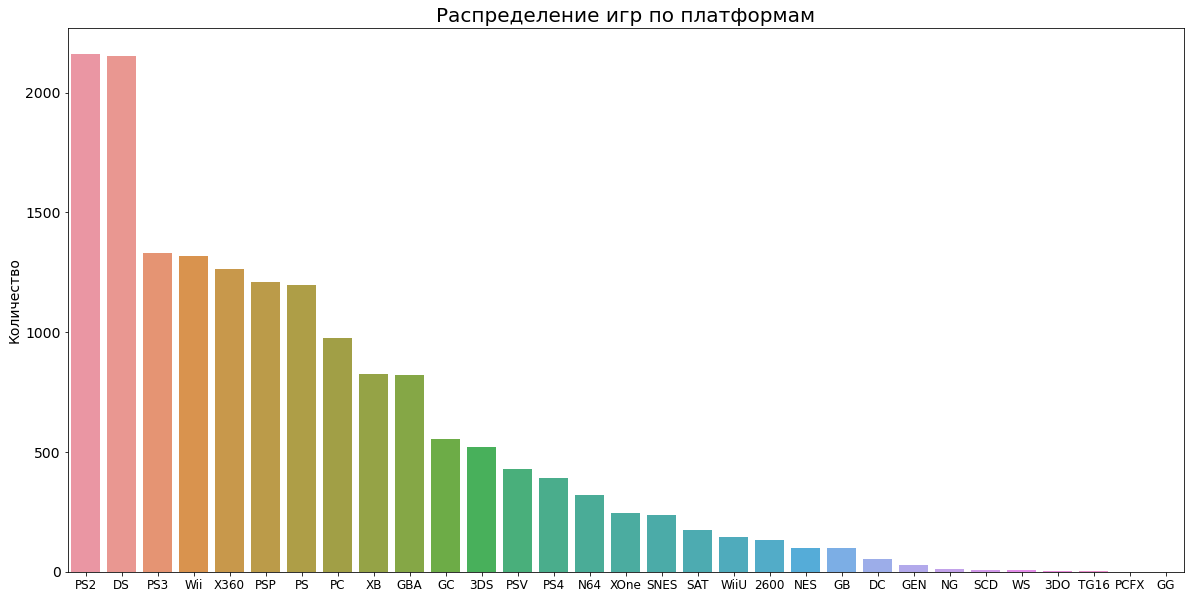

In [19]:
#График распределения игр

plt.figure(figsize=(20, 10))
sns.barplot(x='platform', y='game_count', data=platforms)


plt.title('Распределение игр по платформам', fontsize=20)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

**Вывод**

31 уникальная платформа.

Пропуски отсутствуют.

#### Год выпуска

In [20]:
df['Year_of_Release'].describe().apply(lambda x: format(x, '.0f'))

count    16446
mean      2006
std          6
min       1980
25%       2003
50%       2007
75%       2010
max       2016
Name: Year_of_Release, dtype: object

In [21]:
df['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

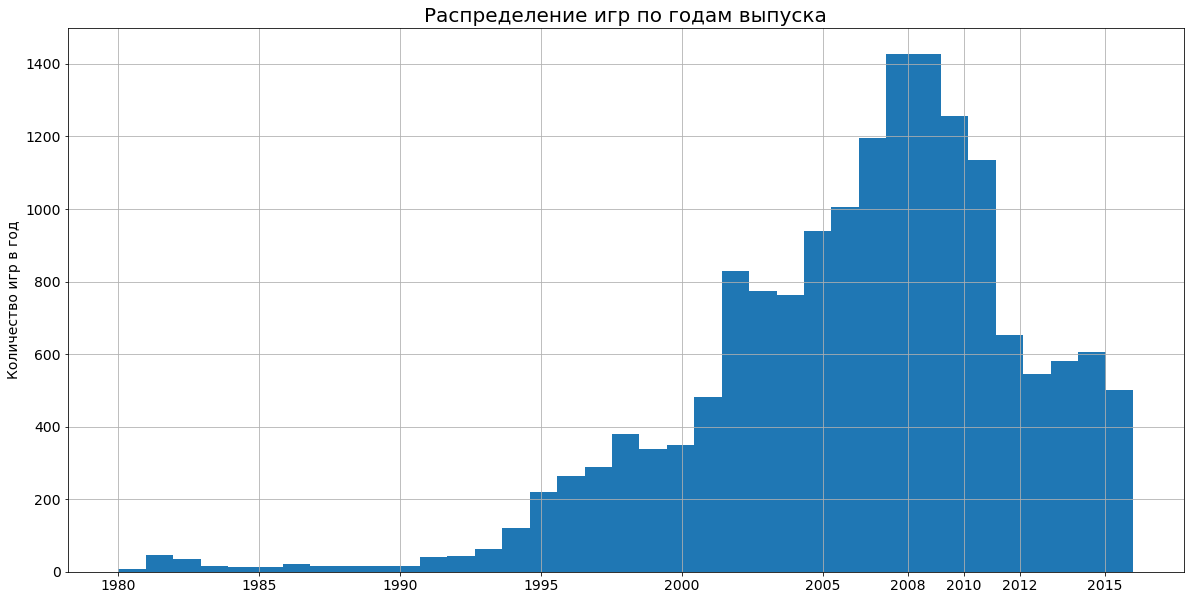

In [22]:
df.plot(
    kind='hist',
    y='Year_of_Release',
    figsize=[20,10],
    bins=37,
    linewidth=5,
    legend=False,
    alpha=1,
    grid=True
)

plt.title('Распределение игр по годам выпуска', fontsize=20)
plt.ylabel('Количество игр в год', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks([1980, 1985, 1990, 1995, 2000, 2005, 2008, 2010, 2012, 2015], fontsize=14)
plt.yticks( fontsize=14);

**Вывод**

269 пропусков.

Самая ранняя игра - 1980 год, самая поздняя - 2016.

Наибольшее количество игр приходится на 2006-2011 года с дальнейшим провалом почти в 2 раза. 

#### Жанр

In [23]:
df['Genre'].nunique()

12

In [24]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [25]:
df[df['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


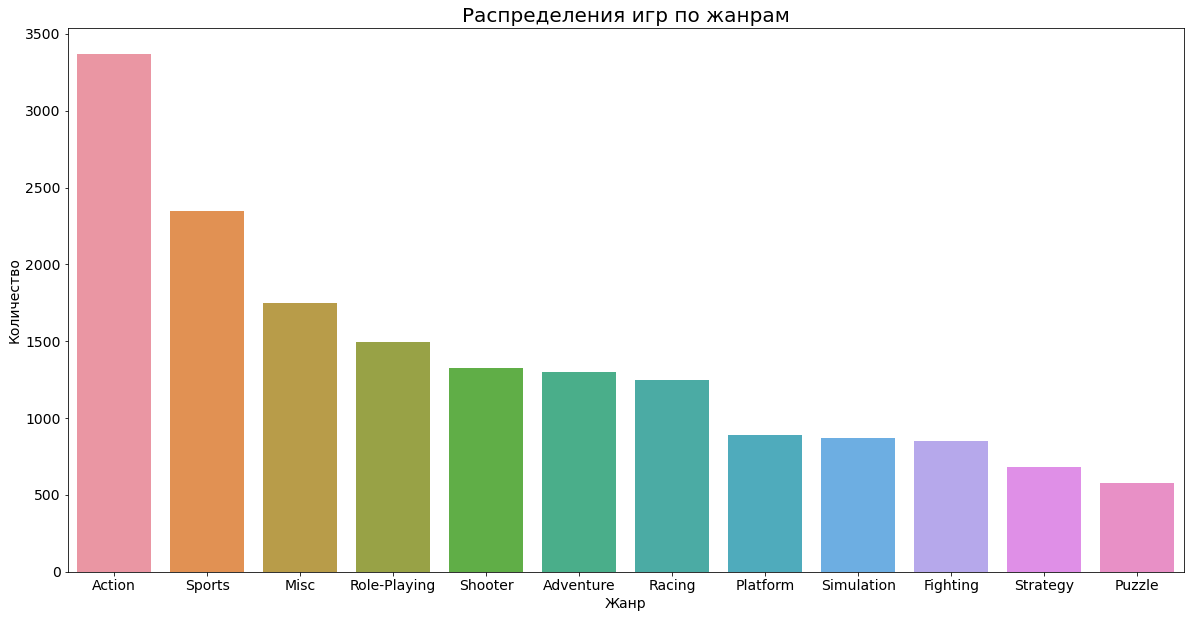

In [26]:
genres = df.pivot_table(index='Genre', values='Other_sales', aggfunc='count').reset_index().sort_values(by='Other_sales', ascending=False)
genres.columns = ['genre', 'game_count']

plt.figure(figsize=(20, 10))
sns.barplot(x='genre', y='game_count', data=genres)


plt.title('Распределения игр по жанрам', fontsize=20)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('Жанр', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

Итак, у нас 12 уникальных жанров и 2 пропуска, которые полностью совпадают с пропусками в названии игр. Чисто теоретически можно было бы заморочиться, по крайней мере по 1 игре с неплохими продажами и вычислить, что это за игра, т.к. за 1993 год на Sega Genesis вышло всего 25 игр, но...

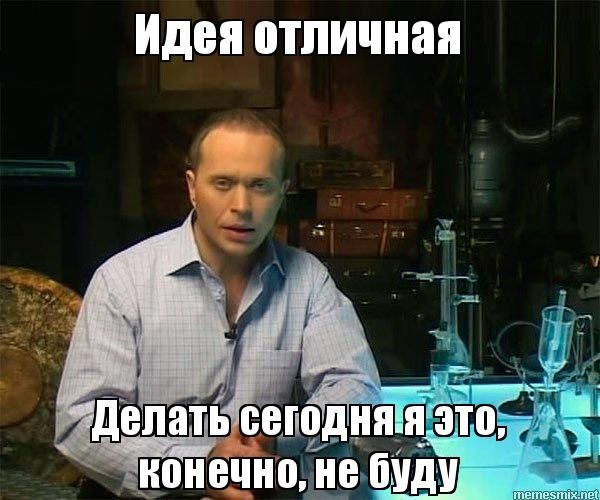

С неплохим отрывом лидируют игры жанра Action, затем ежегодные клоны-симуляторы спортивных состязаний и на третьем месте игры-солянки без определенного жанра (Miscellaneous).

#### Продажи

Изучим продажи, разделенные на 4 "региона" США, Европа, Япония и другие регионы консолидированно.

In [27]:
df[['NA_sales', 'EU_sales', 'JP_sales' ,'Other_sales']].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,NA_sales,EU_sales,JP_sales,Other_sales
count,16715.00,16715.00,16715.00,16715.00
mean,0.26,0.15,0.08,0.05
std,0.81,0.50,0.31,0.19
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.08,0.02,0.00,0.01
75%,0.24,0.11,0.04,0.03
max,41.36,28.96,10.22,10.57


In [28]:
df[['NA_sales', 'EU_sales', 'JP_sales' ,'Other_sales']].sum()

NA_sales       4402.35
EU_sales       2424.67
JP_sales       1297.37
Other_sales     791.32
dtype: float64

Можно заметить, что пропуски в данных в продажах отсутствуют, что удивительно, на фоне слабой заполняемости оценок по играм. Можно предположить, что в тех источниках данных, которые предоставляют данные по продажам, в случае отсутствия данных также проставляется 0 проданных игр, а не NaN.

Также видно, что рынок США значительно превосходит остальные вместе взятые в сумме, так и по отдельности максимальные продажи именно в США (41 млн. против 29 млн. у Европы).

Проверим теорию с NaN = 0 продаж, посчитав количество игр с нулевыми продажами по регионам, их долю, а также игры с полностью нулевыми продажами.

In [29]:
print('Количество игр в США с нулевыми продажами:', (df.query('NA_sales == 0').count()[1]))
print('Доля игр в США с нулевыми продажами:', '{:.2%}'.format((df.query('NA_sales == 0').count()[1]) / (df.count()[1])))
print()
print('Количество игр в Европе с нулевыми продажами:', (df.query('EU_sales == 0').count()[1]))
print('Доля игр в Европе с нулевыми продажами:', '{:.2%}'.format((df.query('EU_sales == 0').count()[1]) / (df.count()[1])))
print()
print('Количество игр в Японии с нулевыми продажами:', (df.query('JP_sales == 0').count()[1]))
print('Доля игр в Японии с нулевыми продажами:', '{:.2%}'.format((df.query('JP_sales == 0').count()[1]) / (df.count()[1])))

Количество игр в США с нулевыми продажами: 4508
Доля игр в США с нулевыми продажами: 26.97%

Количество игр в Европе с нулевыми продажами: 5870
Доля игр в Европе с нулевыми продажами: 35.12%

Количество игр в Японии с нулевыми продажами: 10514
Доля игр в Японии с нулевыми продажами: 62.90%


In [30]:
df.query('NA_sales == 0 and EU_sales == 0 and JP_sales == 0')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8045,Summer Athletics: The Ultimate Challenge,PS2,2008.0,Sports,0.0,0.0,0.0,0.18,NaN,tbd,E
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.00,NaN,NaN,NaN


In [31]:
df.query('NA_sales == 0 and EU_sales == 0')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.0,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.0,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.0,3.44,0.00,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.0,3.19,0.00,NaN,NaN,NaN
530,Dragon Quest V: Tenkuu no Hanayome,SNES,1992.0,Role-Playing,0.0,0.0,2.78,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.0,0.0,0.01,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.0,0.0,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.0,0.0,0.01,0.00,NaN,NaN,NaN


Вырисовывается интересная картина.

Игр, которые вообще не продались на своей платформе - всего 2 (третья игра продавалась в других регионах),
при этом игр, которые не продались в США И Европе - более 3тыс.

В свою очередь ряд этих игр продался в Японии очень даже неплохо (по несколько млн), что может свидетельствовать (что и так понятно), об особенностях Японского рынка по вкусу на игры (например Monster Hunter Freedom 3 и Monster Hunter 4 - чисто слешер для японского зрителя), а также особенностями распространения игр на опредленных консолях (опять же с поправкой на вкус к играм (например Dragon Quest на Super Nintendo).

Таким образом, теория о том, что 0 заменяют отсутствие данных о продажах не подтверждается. Чаще всего 0 это и правда 0 в продажах. 
Более детально изучим это в шаге 4 с построением портрета пользователей регионов. 

#### Оценки критиков и игроков

In [32]:
df['Critic_Score'].isna().sum()

8578

In [33]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Оценки критиков представлены целочисленной оценкой по 100-балльной шкале. 

Более половины оценок - пропуски. 

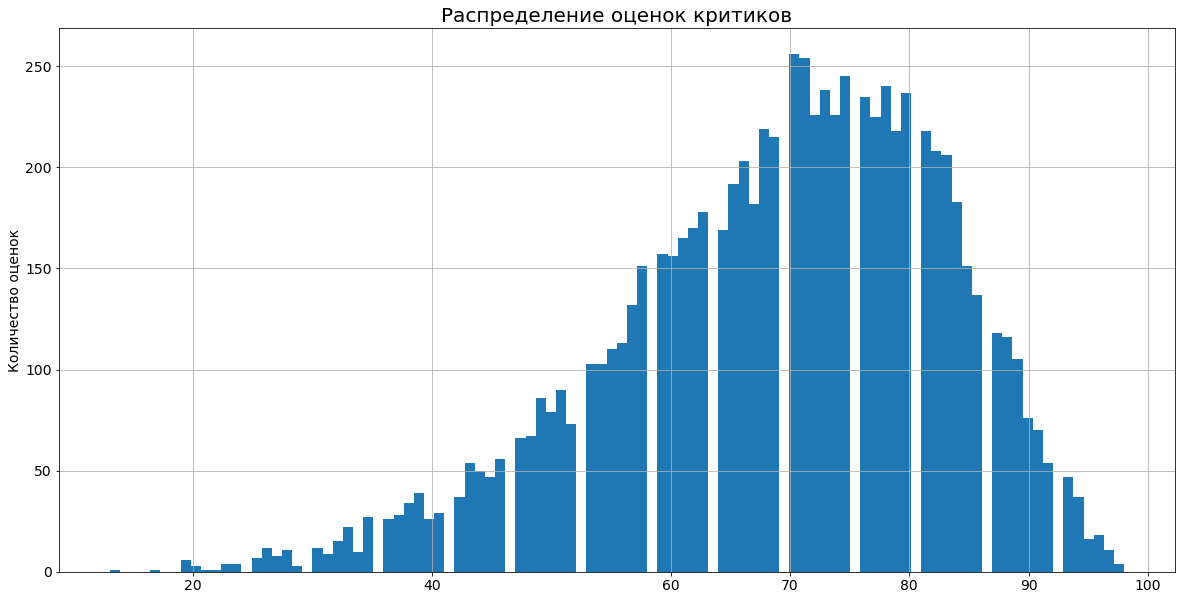

In [34]:
df.plot(
    kind='hist',
    y='Critic_Score',
    figsize=[20,10],
    bins=100,
    linewidth=5,
    legend=False,
    alpha=1,
    grid=True
)

plt.title('Распределение оценок критиков', fontsize=20)
plt.ylabel('Количество оценок', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks([20 ,40, 60, 70, 80, 90, 100], fontsize=14)
plt.yticks(fontsize=14);

Оценки пользователей

In [35]:
df['User_Score'].isna().sum()

6701

In [36]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [37]:
df.query('User_Score == "tbd"').head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Итак, оценки пользователей представлены в виде 10 балльной системы с дробной частью числа.

Помимо пропусков в объеме чуть менее трети выборки имеются значения tbd, что означает To Be Determined, то есть оценка подлежит уточнению. 
С учетом того, что многие не особо новые игры имеют подобную оценку, возможно предположить, что источник, откуда брались оценки пользователей, таким образом помечал игры у которых не набралось достаточно количество оценок для публикации средней от всех пользователей.
Косвенно это можно подтвердить разъяснением термина tbd от одного из крупнейших сайтов с оценками игр - Metacritic: "To help ensure that METASCORES accurately reflect the reviews given by critics for any particular movie, game, television show or album, we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display."

#### Возрастной рейтинг игры

In [38]:
df['Rating'].isna().sum()

6766

In [39]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

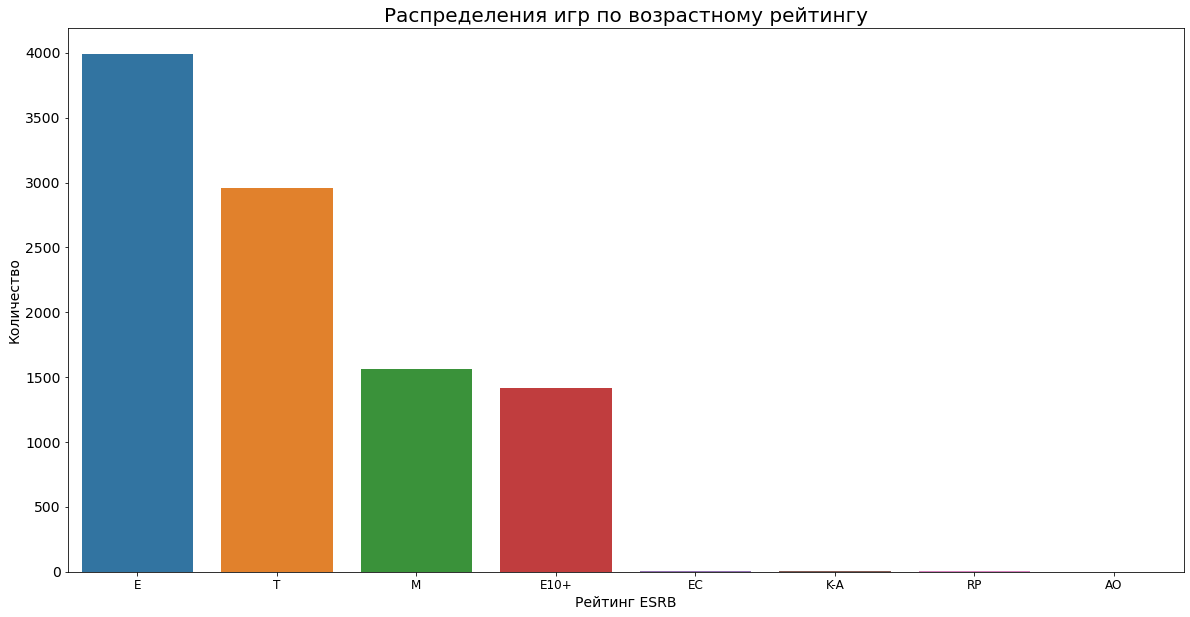

In [40]:
rating = df.pivot_table(index='Rating', values='Other_sales', aggfunc='count').reset_index().sort_values(by='Other_sales', ascending=False)
rating.columns = ['rating', 'game_count']


plt.figure(figsize=(20, 10))
sns.barplot(x='rating', y='game_count', data=rating)


plt.title('Распределения игр по возрастному рейтингу', fontsize=20)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('Рейтинг ESRB', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

**Итак:**

- Е - «Everyone» — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. (она же K-A);
- Т - «Teen» — «Подросткам»: Игра подходит для лиц от 13 лет.
- M - «Mature» — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- E10+ - «Everyone 10 and older» - Для всех от 10 лет и старше

<a id='2'></a>
## Подготовка данных

-	Замените названия столбцов (приведите к нижнему регистру);
-	Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости: 
-	Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
-	Опишите причины, которые могли привести к пропускам;
-	Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;


-	Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


### Работа с заголовками

In [41]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [42]:
#переименовываем

df.columns = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'] 

In [43]:
df.head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с пропусками

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, надо разобаться с пропусками в годах, оценках и рейтингах. 

Для начала, взглянем на пару примеров ниже:

In [45]:
df.query('name == "Call of Duty: Black Ops II"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
1227,Call of Duty: Black Ops II,PC,2012.0,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M
4706,Call of Duty: Black Ops II,WiiU,2012.0,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M


In [46]:
df.query('name == "Grand Theft Auto V"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


In [47]:
df.query('name == "Grand Theft Auto: San Andreas"')

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,0.00,0.93,0.00,0.04,93.0,8.9,M
10311,Grand Theft Auto: San Andreas,X360,2008.0,Action,0.08,0.02,0.00,0.01,NaN,7.5,M


Что мы видим.
Одна и та же игра может выходить на разных платформах с разрывом как минимум в 4 года. При этом в случае, даже если игра выходит в одно время на всех платформах (например CoD), то разрыв оценок на разных платформах может быть в 40% на зрительских оценках и 11% в оценках критиков. 

Следовательно пытаться заполнить пропуски в годах и оценках, если опираться на поиск аналогичной игры на другой платформе может привести к большим искажениям данных (даже если брать среднюю или медиану). Таким образом, если мы планируем брать эти данные для дальнейшего прогноза, то лучше оставить пропуски и анализировать оставшиеся данные.

Говоря о возрастном рейтинге тут можно попробовать закрыть пропуски через поиск аналогичной игры. Все таки рейтингует игру одна и та же организация, поэтому расхождение быть не должно быть (расхождение в GTA SA даже между иксбоксами мне не совсем понятно. Возможно связано с политикой XB на 2005 год. 

Однако, совсем сдаваться мы не будем, взглянем на игры, у которых нет года. 

In [48]:
df[df['release_year'].isna()].head(30)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Итак, у нас имеется некоторый пул, так называемых, конвеерных спортивных игр с годом в название. Однако соблазн тут же стянуть год в таблицу нужно побороть и вспомнить, что дата релиза подобных игр обычно годом ранее, чем оно в название (как правило осенью).

Плюс, ко всему прочему, если с Фифой и Песом все понятно, то вот американский футбол в виде Madden подстроил подлянку. 
Если в 2004 году у них и была такая цифра в название, то сезон 2007 они написали как 07.
Да и Тайгер Вудс с Млб туда же (07, 20-03).

Поправим немного игр руками, чтобы уж совсем не было грустно, тем более имеются достаточно топовые игры по продажам.
Также имеет смысл погуглить года в играх с большими продажами и внести их руками.
Ну а что, работа аналитика не всегда сахар)

Ну и для показательности, что вся эта ручная работа была не зря, объем упущенных продаж из-за отсутсвия года до заполнения пропусков и после. 

In [49]:
df[df['release_year'].isna()].sum()

name            Madden NFL 2004FIFA Soccer 2004LEGO Batman: Th...
platform        PS2PS2WiiPS22600X360GBAWiiWiiWiiPCPS3PS2600PSP...
release_year                                                  0.0
genre           SportsSportsActionFightingShooterMiscAdventure...
na_sales                                                    59.15
eu_sales                                                    24.46
jp_sales                                                      6.7
other_sales                                                  8.61
critic_score                                              10408.0
dtype: object

In [50]:
df[df['release_year'].isna()].head(10).sort_values(by='na_sales', ascending=False)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [51]:
df[df['release_year'].isna()].head(10).sort_values(by='eu_sales', ascending=False)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [52]:
df[df['release_year'].isna()].head(10).sort_values(by='jp_sales', ascending=False)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [53]:
df.loc[183, 'release_year'] = 2003
df.loc[377, 'release_year'] = 2003
df.loc[1650, 'release_year'] = 2002
df.loc[2479, 'release_year'] = 2006
df.loc[2849, 'release_year'] = 2010
df.loc[456, 'release_year'] = 2008
df.loc[657, 'release_year'] = 2001
df.loc[627, 'release_year'] = 2007
df.loc[805, 'release_year'] = 2007
df.loc[1142, 'release_year'] = 2007
df.loc[1840, 'release_year'] = 2007
df.loc[678, 'release_year'] = 2008
df.loc[719, 'release_year'] = 2006
df.loc[475, 'release_year'] = 2005
df.loc[1131, 'release_year'] = 2010
df.loc[15957, 'release_year'] = 2010

In [54]:
df[df['release_year'].isna()].sum()

name            Space InvadersTriple Play 99AdventureLEGO Batm...
platform        2600PS2600PSP2600WiiXBPSGB2600PS2X360PS2PS3PS3...
release_year                                                  0.0
genre           ShooterSportsAdventureActionActionActionAction...
na_sales                                                    38.51
eu_sales                                                    15.56
jp_sales                                                     6.65
other_sales                                                  4.73
critic_score                                               9272.0
dtype: object

Остальные пропуски заполним как 0, чтобы в дальнейшем нам не мешало.

In [55]:
df['release_year'] = df['release_year'].fillna(0)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   release_year  16715 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Дропнем 2 непонятные игры из 93 года

In [57]:
df[df['name'].isna()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [58]:
df = df.dropna(subset=['name']) 

Как я уже ранее говорил, заполнять оценки критиков и игроков средними и прочим нецелесообразно, поэтому заполним все отсутствующие значения 0, чтобы в дальнейшем это нам не мешало в статистическом анализе.

Отдельно хотелось бы отметить, что tbd, в нашем случае, тоже отсутствующее значение и оно тоже будет заполнено 0.

In [59]:
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)
df = df.replace('tbd', 0)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16713 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    16713 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Поработаем с возрастным рейтингом.

Поменяем K-A на E.

А RP на 0 (т.к. это тоже отсутсвтующий рейтинг)

И попробуем заполнить пропуски в рейтингах по аналогичной игре. 

In [61]:
df = df.replace('K-A', 'E')

In [62]:
df.isna().mean()

name            0.000000
platform        0.000000
release_year    0.000000
genre           0.000000
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
critic_score    0.000000
user_score      0.000000
rating          0.404715
dtype: float64

In [63]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [64]:
def rating(row):
    
    rating = row['rating']
    
    if rating == 'EC':
        return 0
    elif rating == 'E':
        return 1
    elif rating == 'E10+':
        return 2    
    elif rating == 'T':
        return 3      
    elif rating == 'M':
        return 4      
    elif rating == 'AO':
        return 5      


df['rating_cat'] = df.apply(rating, axis=1)

In [65]:
data_transformed = df.groupby('name')['rating_cat'].transform('max')

df['rating_cat'] = df['rating_cat'].fillna(data_transformed)

In [66]:
df.isna().mean()

name            0.000000
platform        0.000000
release_year    0.000000
genre           0.000000
na_sales        0.000000
eu_sales        0.000000
jp_sales        0.000000
other_sales     0.000000
critic_score    0.000000
user_score      0.000000
rating          0.404715
rating_cat      0.378687
dtype: float64

Отлично, удалось убрать 2.6% пропусков или 435 игр.
Вернем теперь все в буквенное обозначение и **заполним None нулями (пригодится на последнем шаге для отслеживания доли проданных игр с отсутствующими рейтингами).**

In [67]:
def rating(row):
    
    rating = row['rating_cat']
    
    if rating == 0:
        return 'EC'
    elif rating == 1:
        return 'E'
    elif rating == 2:
        return 'E10+'    
    elif rating == 3:
        return 'T'      
    elif rating == 4:
        return 'M'      
    elif rating == 5:
        return 'AO'      


df['rating'] = df.apply(rating, axis=1)

df = df.drop(['rating_cat'], axis=1)

In [68]:
df['rating'] = df['rating'].fillna(0)

In [69]:
df.isna().mean()

name            0.0
platform        0.0
release_year    0.0
genre           0.0
na_sales        0.0
eu_sales        0.0
jp_sales        0.0
other_sales     0.0
critic_score    0.0
user_score      0.0
rating          0.0
dtype: float64

С пропусками все, перейдем к типам данных.

### Преобразование типов данных

Приводим год выпуска и баллы от критиков к целочисленному значению, а баллы игроков переводим в целое число по 100 балльной шкале (аналогично баллам критиков) и также приводим к целочисленному виду. 

In [70]:
df

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,0
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,0
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,0
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,0


In [71]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='raise') 

df['user_score'] = df['user_score'] * 10

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16713 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    16713 non-null  float64
 10  rating        16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [72]:
df['release_year'] = df['release_year'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   release_year  16713 non-null  int32  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  16713 non-null  int32  
 9   user_score    16713 non-null  int32  
 10  rating        16713 non-null  object 
dtypes: float64(4), int32(3), object(4)
memory usage: 1.3+ MB


In [73]:
df.head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0


### Расчет суммарных продаж во всех регионах

In [74]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [75]:
df.head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0,31.38


С предобработкой покончено, можно переходить к настоящей работе.

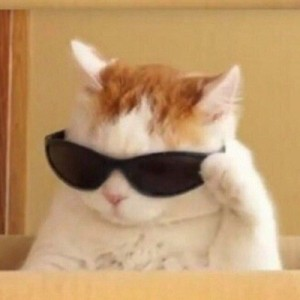

<a id='3'></a>
## Исследовательский анализ данных

-	Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
-	Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
-	Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
-	Не учитывайте в работе данные за предыдущие годы.
-	Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
-	Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
-	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
-	Соотнесите выводы с продажами игр на других платформах.
-	Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [76]:
df.head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0,31.38


<a id='31'></a>
### Анализ выпуска игр по годам

In [77]:
df['release_year'].describe().apply(lambda x: format(x, '.0f'))

count    16713
mean      1976
std        246
min          0
25%       2003
50%       2007
75%       2010
max       2016
Name: release_year, dtype: object

Итак, у нас остались нулевые года после последней предобработки, в шаге 3.3 мы от них точно избавимся, как и от ряда ранних годов, поэтому удалим их сейчас и построим гистограмму распределения. 

In [78]:
df_years = df.query('release_year > 0')
df_years['release_year'].describe().apply(lambda x: format(x, '.0f'))

count    16459
mean      2006
std          6
min       1980
25%       2003
50%       2007
75%       2010
max       2016
Name: release_year, dtype: object

In [79]:
# Старый график
#df_years.plot(
#    kind='hist',
#    y='release_year',
#    figsize=[20,10],
#    bins=37,
#    linewidth=5,
#    legend=False,
#    alpha=1,
#    grid=True
#)

#plt.title('Распределение игр по годам выпуска', fontsize=20)
#plt.ylabel('Количество игр в год', fontsize=14)
#plt.xlabel('', fontsize=14)
#
#plt.xticks([1980, 1985, 1990, 1995, 2000, 2005, 2008, 2010, 2012, 2015], fontsize=14)
#plt.yticks( fontsize=14);

In [80]:
df_years

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0,0,0.01


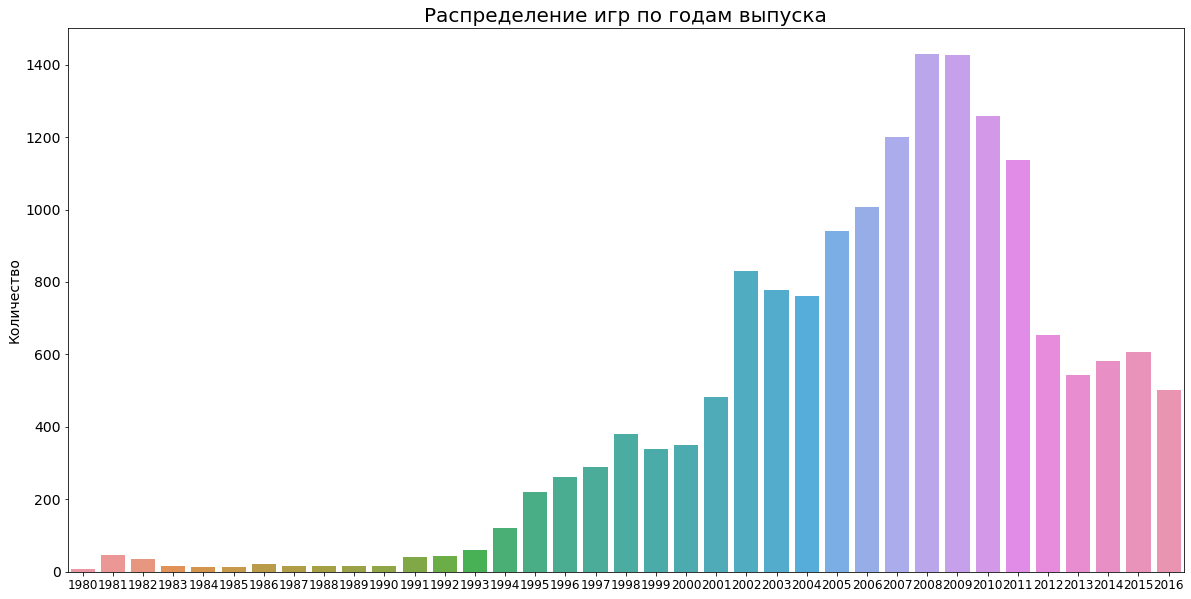

In [81]:
#График распределения игр

df_years_pivot = df_years.pivot_table(index='release_year', values='sales', aggfunc='count').reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x='release_year', y='sales', data=df_years_pivot)


plt.title('Распределение игр по годам выпуска', fontsize=20)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

**Вывод**

Итак, первая игра в нашей выборке появилась в 1980 году, однако очевидно, что за первые 15 лет массового распространения они не получили и лишь с 1993-95 года начинается стабильный рост выпуска игр в год. "Золотым веком" игр по количеству выпуска в год можно назвать период с 2006 по 2011 год. Тогда, каждый год выходило более 1000 игр в год. 
Однако кажется очень интересным значительное падение выпуска игр после 2011 года.
Стоит немного окунуться в историю видео-игр. Если 2000-года ознаменовались подъемом видео-игр, появлением первых ААА-тайтлов, развитием независимых разработчиков инди-игр, то 2010 принесли активное вхождение ТВ с разъемами HDMI, как следствие рост разрешения экранов, вплоть до 4К, что потянуло за собой повышение требований к железу. 
В 2013 году вышли новые поколения консолей, Xbox One и PS4.
В целом, в 2012-2015 года видна стабилизация объема выхода игр.
Как причину почти двухкратного падения объема также нельзя не назвать консолидацию игровых разработчиков (что мы наблюдаем и по сей день). Выпуск игр уже воспринимается как полностью самостоятельный и сверхприбыльный бизнес, поэтому мелкие команды и компании активно скупаются и поглощаются более крупными игроками. Также уменьшается количество энтузиастов, которые до этого могли написать нетравиальную по графике игру и выстрелить. Требования к графике и, как следствие, повышение требований к разработке игр полностью перекроило индустрию видео-игр. 

Очевидно одно, что в целях прогнозирование рекламных компаний, вложения в какие-либо определенные платформы - брать данные ранее 1995-2000 года будет нерелевантно. 

**Финальный тезис по взятому актуальному периоду прогнозирования озвучу в разделе 3.3.**

<a id='32'></a>
### Анализ продаж по платформам

In [82]:
#Повторим создание сводной таблицы по платформам из шага 1.3.2

platforms_games = df.pivot_table(index='platform', values='other_sales', aggfunc='count').reset_index().sort_values(by='other_sales', ascending=False)
platforms_games.columns = ['platform', 'game_count']
platforms_games.head(5)

,platform,game_count
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262


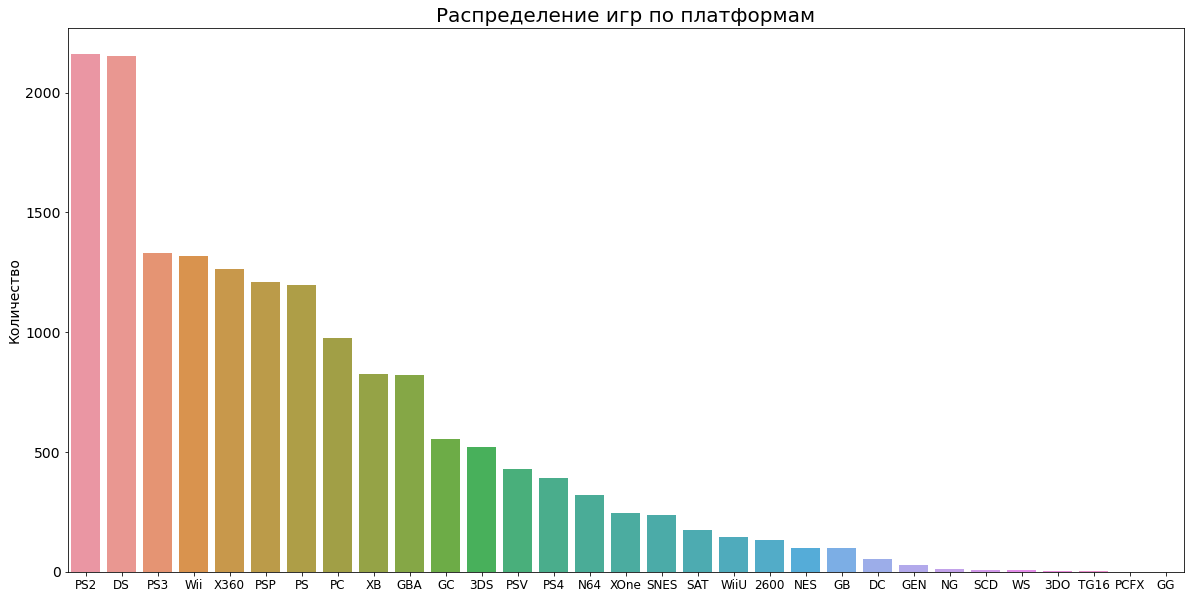

In [83]:
#График распределения игр

plt.figure(figsize=(20, 10))
sns.barplot(x='platform', y='game_count', data=platforms_games)


plt.title('Распределение игр по платформам', fontsize=20)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

Топ платформ по количеству игр выделили. Явные лидери это PS2 и Nintendo DS. Далее с неплохим отрывом кучкуются более новые приставки, а также, на 8 месте ПК-бояре. Однако есть ли связь между количеством игр и продажами. Может Пк-бояре окажутся более платежспособные, если проанализовать суммарные продажи?

In [84]:
platforms_sales = df.pivot_table(index='platform', values='sales', aggfunc='sum').reset_index().sort_values(by='sales', ascending=False)
platforms_sales.columns = ['platform', 'total_sales']
platforms_sales.head(5)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


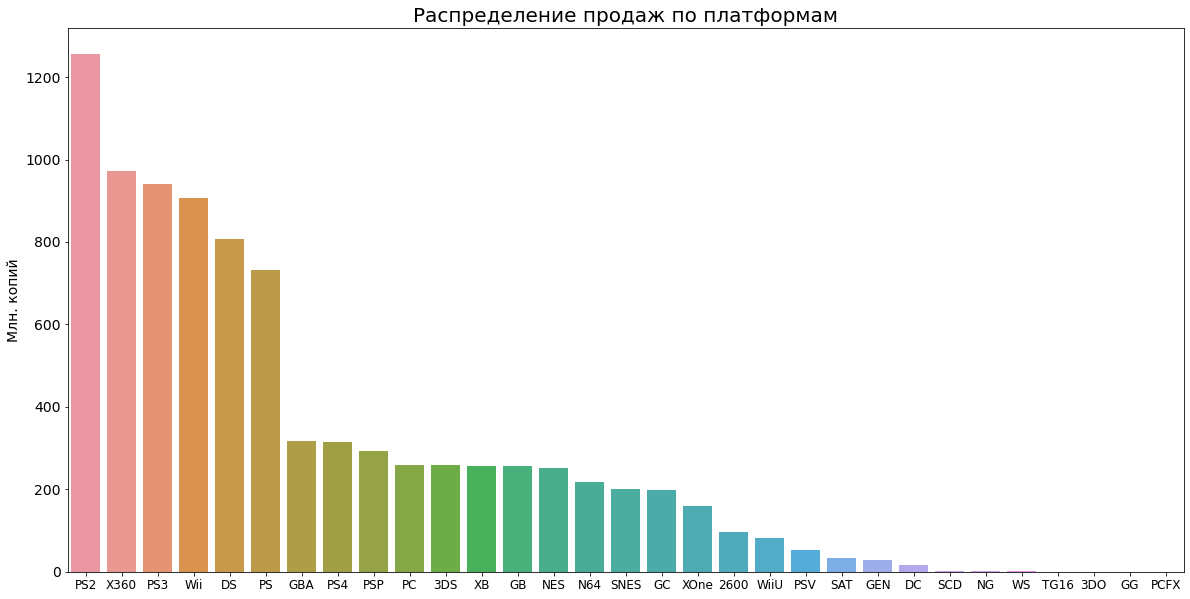

In [85]:
plt.figure(figsize=(20, 10))
sns.barplot(x='platform', y='total_sales', data=platforms_sales)


plt.title('Распределение продаж по платформам', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

Итак, PS2 лидирует по обоим показателям. 
Для более детального отображения посчитаем так называемую эффективность продаж по платформам, как количество проданных копий делить на количество игр. Результирующий показатель будет отображать среднее количество копий в млн. штук приходящееся на 1 игру. 

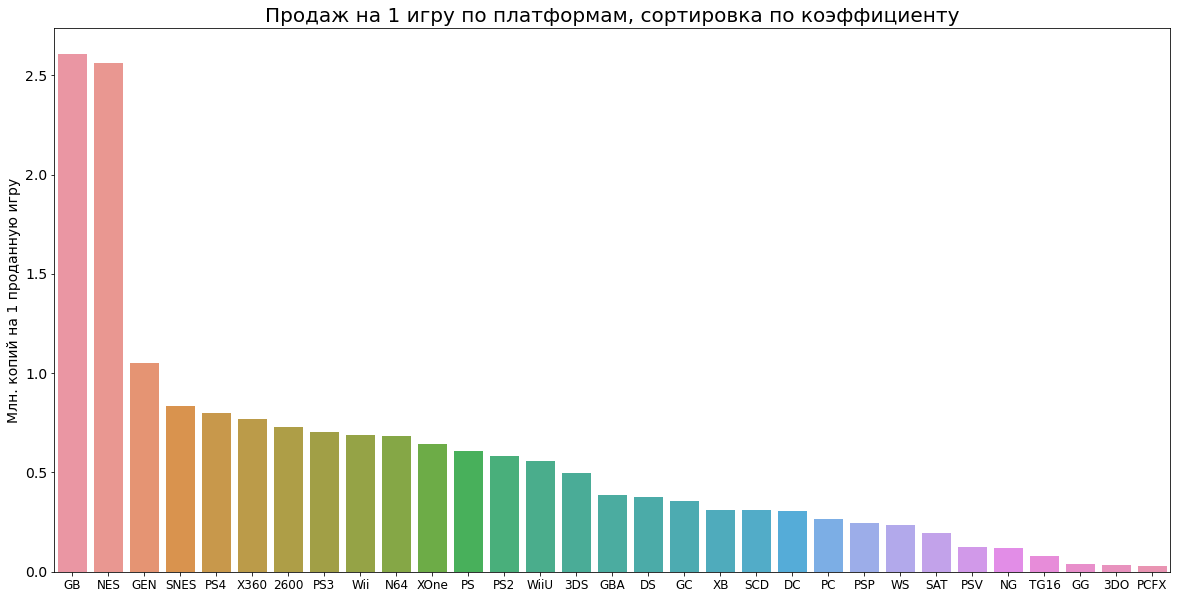

In [86]:
platforms_games = platforms_games.sort_values(by='platform')
platforms_sales = platforms_sales.sort_values(by='platform')
platforms_sales['sales_coeff'] = platforms_sales['total_sales'] / platforms_games['game_count']
platforms_sales = platforms_sales.sort_values(by='sales_coeff', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='platform', y='sales_coeff', data=platforms_sales)


plt.title('Продаж на 1 игру по платформам, сортировка по коэффициенту', fontsize=20)
plt.ylabel('Млн. копий на 1 проданную игру', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

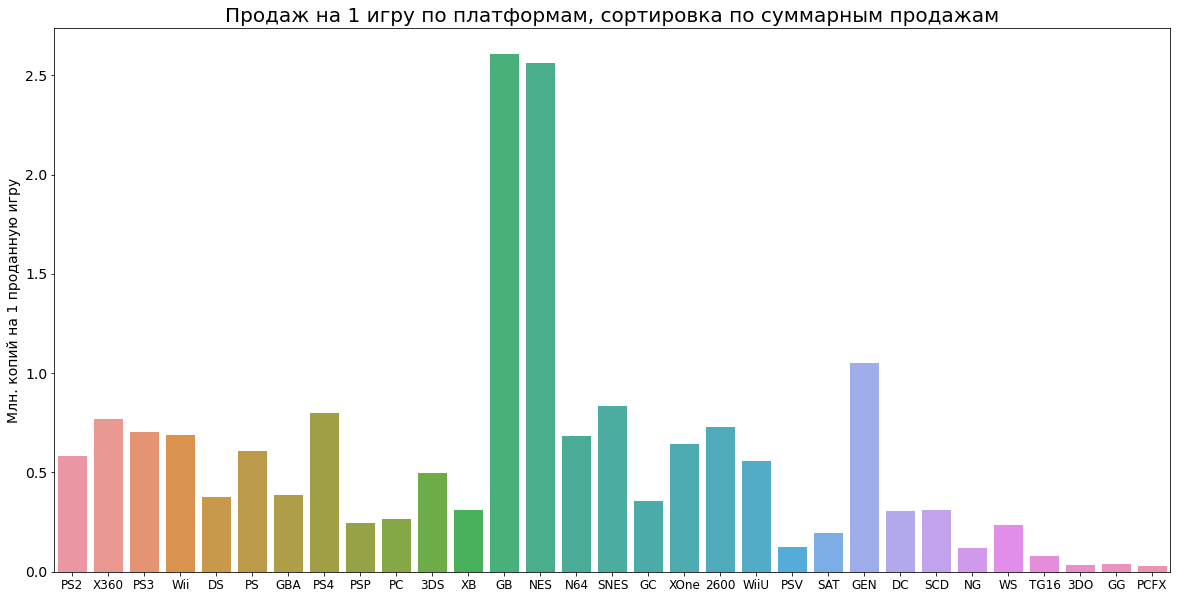

In [87]:
platforms_sales = platforms_sales.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='platform', y='sales_coeff', data=platforms_sales)


plt.title('Продаж на 1 игру по платформам, сортировка по суммарным продажам', fontsize=20)
plt.ylabel('Млн. копий на 1 проданную игру', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

Вырисовывается очень интересная картина. Самыми эффективными платформами были те, которые находятся в середине и конце списка по общему объему продаж. Да и это достаточно старые платформы. Так, Game Boy это 1989 год выпуска, NRD (Nintendo) 1983 год. Можно ли утверждать, что малые высокие удельные продажи на одну игру говорят о том, что пользователям просто было не из чего выбирать, поэтому одну и ту же игру покупало множество человек. Вполне.

Текущие лидеры по абсолютным продажам в живут другой экономической и рыночной реальности, при этом в среднем ни одна игра не продается копиями более 1 млн, но тут скорее среднюю портит то, что многие игры так и остаются незамеченными пользователями и продаются штучными копиями, находясь на захолустьях интернет магазинов, а некоторые продаются десятками млн. копий и становятся бестселлерами. 

Возьмем для погодичного анализа выхода игр не просто топ по продажам, а такой топ, чтобы можно было отследить смену поколений игровых консолей и подтвердить или опровергуть жесткие рамки 6-8 поколений консолей.

Для этого, для начала, воспользуемся гуглом и создадим справочную таблицу с расшифровками сокращений игровых приставок, их поколение и принадлежность к системе и год выпуска.

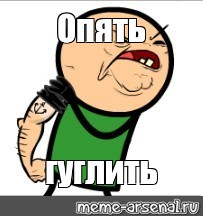

In [88]:
data = {'platform_short': ['PS', 'PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne', 'NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'PSP', 'PSV', 'PC', '3DO', 'TG16', 'PCFX', '2600', 'GG', 'GEN', 'SCD', 'SAT', 'DC', 'WS', 'NG'], 
        'platform_full': ['Play Station', 'Play Station 2', 'Play Station 3', 'Play Station 4', 'Xbox', 'Xbox 360', 'Xbox One', 'Nintendo Entertainment System', 'Super Nintendo Entertainment System', 'Nintendo 64', 'Nintendo GameCube', 'Wii', 'Wii U', 'Game Boy', 'Game Boy Advance', 'Nintendo DS', 'Nintendo 3DS', 'PlayStation Portable', 'PlayStation Vita', 'Pesonal Computer', '3DO Interactive Multiplayer', 'TurboGrafx-16', 'PC-FX', 'Atari 2600', 'Sega Game Gear', 'Sega Genesis (Mega Drive)', 'Sega CD', 'Sega Saturn', 'Dreamcast', 'WonderSwan', 'Neo-Geo'],
       'system': ['PlayStation', 'PlayStation', 'PlayStation', 'PlayStation', 'Xbox', 'Xbox', 'Xbox', 'Wii', 'Wii', 'Wii', 'Wii', 'Wii', 'Wii', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'PS Portable', 'PS Portable', 'PC', '3DO', 'NEC', 'NEC', 'Atari', 'Sega', 'Sega', 'Sega', 'Sega', 'Sega', 'WonderSwan', 'Neo-Geo'],
       'generation': [5, 6, 7, 8, 6, 7, 8, 3, 4, 5, 6, 7, 8, 4, 6, 7, 8, 7, 8, 0, 5, 4, 5, 2, 4, 4, 4, 5, 6, 5, 4],
       'release_date': [1994, 2000, 2006, 2013, 2001, 2005, 2013, 1983, 1990, 1996, 2001, 2006, 2012, 1989, 2001, 2004, 2011, 2004, 2011, 1961, 1993, 1987, 1994, 1977, 1990, 1989, 1991, 1994, 1998, 1999, 1990]}

In [89]:
df_platfroms_cat = pd.DataFrame(data=data) 

In [90]:
df_platfroms_cat

,platform_short,platform_full,system,generation,release_date
0,PS,Play Station,PlayStation,5,1994
1,PS2,Play Station 2,PlayStation,6,2000
2,PS3,Play Station 3,PlayStation,7,2006
3,PS4,Play Station 4,PlayStation,8,2013
4,XB,Xbox,Xbox,6,2001
5,X360,Xbox 360,Xbox,7,2005
6,XOne,Xbox One,Xbox,8,2013
7,NES,Nintendo Entertainment System,Wii,3,1983
8,SNES,Super Nintendo Entertainment System,Wii,4,1990
9,N64,Nintendo 64,Wii,5,1996


Поэтому предлагается посмотреть не просто топ по продажам, а отследить историю нескольких линеек через поколения.

- PlayStation: PS, PS2, PS3, PS4
- Xbox: XB, X360, XOne
- Nintendo: GB, GBA, DS, 3DS
- Wii: N64, GC ,Wii, WiiU

Отдельно также взглянем на продажи ПК игр (PC).

In [91]:
df_PS = df_years.query('(platform == "PS") or (platform == "PS2") or (platform == "PS3") or (platform == "PS4")')
df_PS.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,90,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,87,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,84,E,14.97
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,0,14.63


In [92]:
df_PS.shape

(5021, 12)

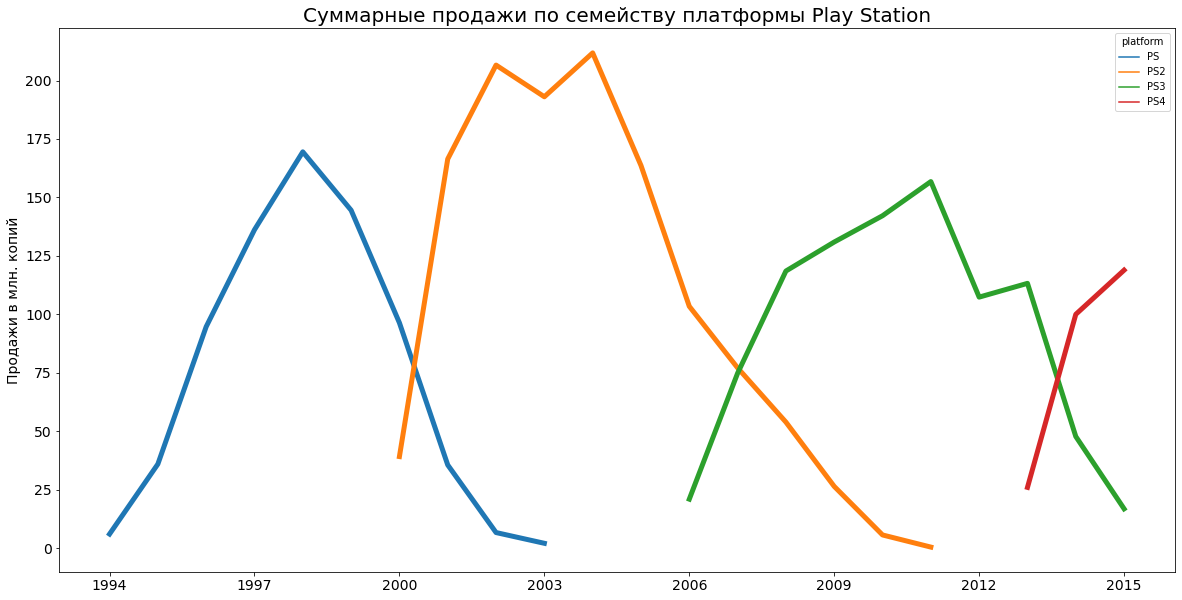

In [93]:
df_PS_pivot = df_PS.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index()
df_PS_pivot = df_PS_pivot.query('release_year < 2016')


plt.figure(figsize=(20, 10))
sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_PS_pivot, palette="tab10")

plt.title('Суммарные продажи по семейству платформы Play Station', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)


years = []

for i in range (1994, 2016, 3):
    years.append(i)
    
plt.xticks(years ,fontsize=14)

mln = []

for i in range (0, 201, 25):
    mln.append(i)

plt.yticks(mln, fontsize=14);

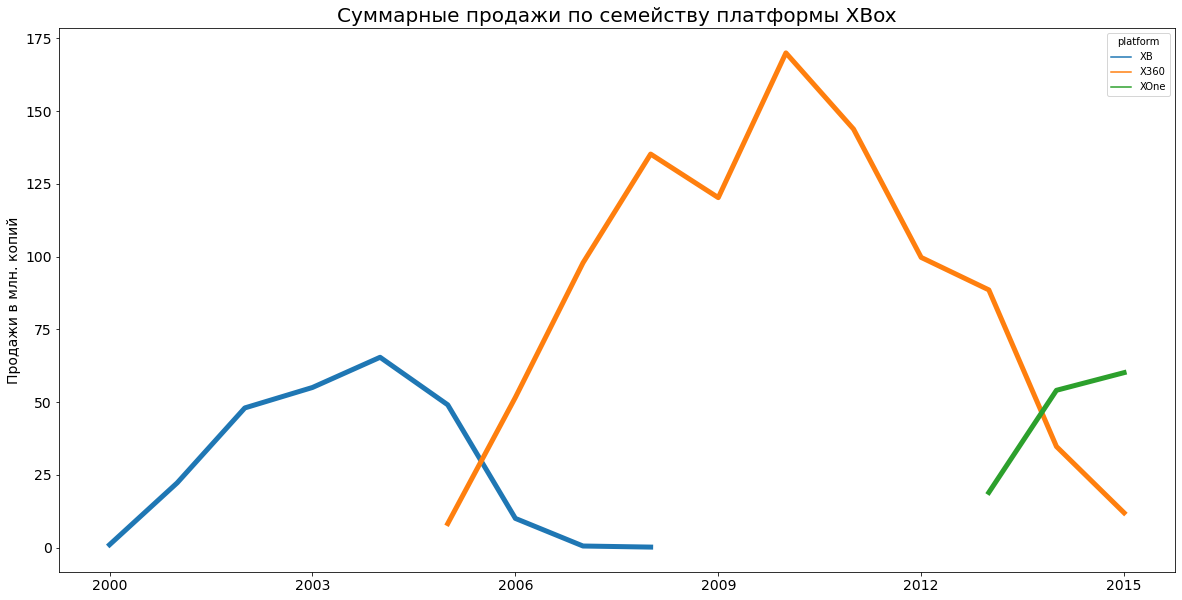

In [94]:
df_XB = df_years.query('(platform == "XB") or (platform == "X360") or (platform == "XOne")')
df_XB_pivot = df_XB.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index().sort_values(by='release_year')
df_XB_pivot = df_XB_pivot.query('release_year < 2016')

plt.figure(figsize=(20, 10))

sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_XB_pivot, palette="tab10")

plt.title('Суммарные продажи по семейству платформы XBox', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

years = []

for i in range (2000, 2016, 3):
    years.append(i)
    
plt.xticks(years, fontsize=14)
plt.yticks(fontsize=14);

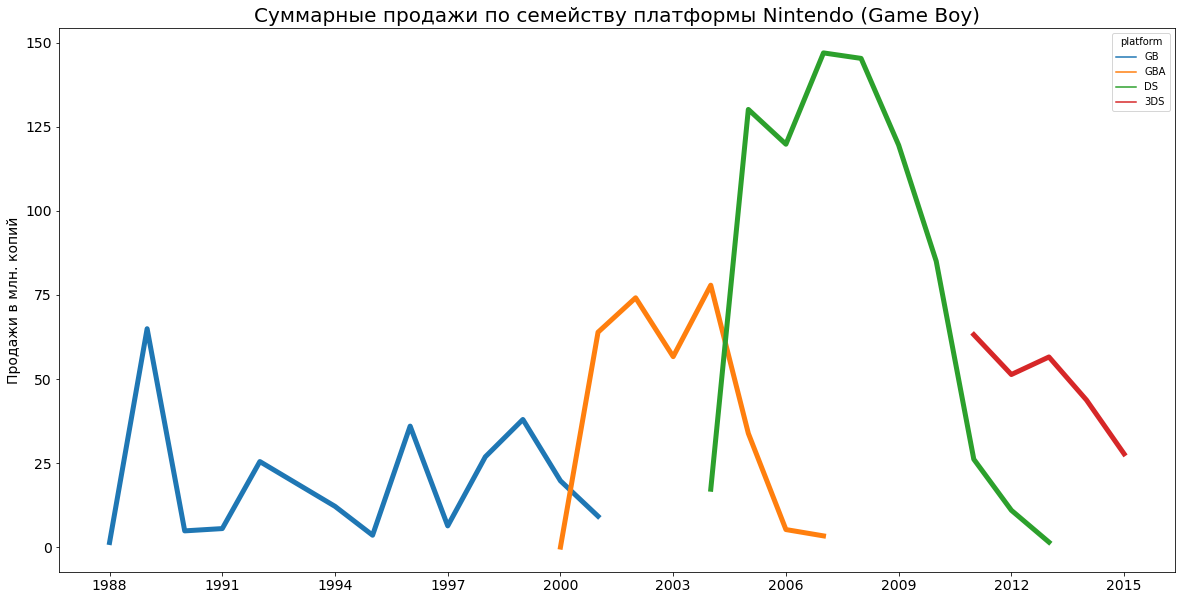

In [95]:
df_GB = df_years.query('(platform == "GB") or (platform == "GBA") or (platform == "DS") or (platform == "3DS")')
df_GB_pivot = df_GB.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index().sort_values(by='release_year')
df_GB_pivot = df_GB_pivot.query('release_year < 2016')

plt.figure(figsize=(20, 10))

sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_GB_pivot, palette="tab10")

plt.title('Суммарные продажи по семейству платформы Nintendo (Game Boy)', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

years = []

for i in range (1988, 2016, 3):
    years.append(i)
    
plt.xticks(years ,fontsize=14)

mln = []

for i in range (0, 160, 25):
    mln.append(i)

plt.yticks(mln, fontsize=14);

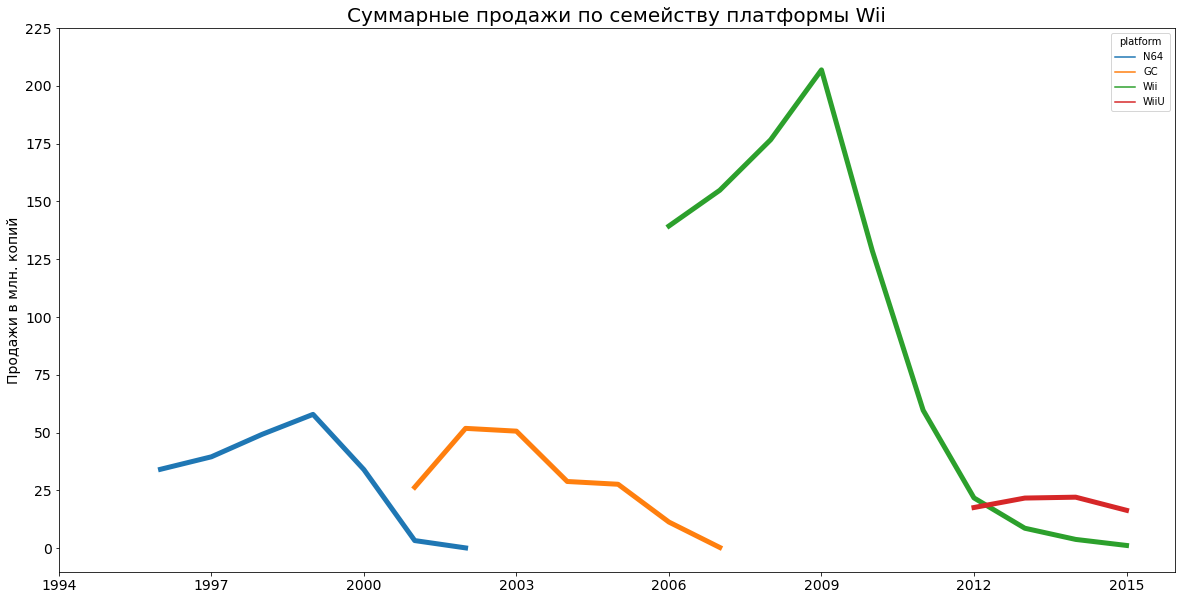

In [96]:
df_W = df_years.query('(platform == "N64") or (platform == "GC") or (platform == "Wii") or (platform == "WiiU")')
df_W_pivot = df_W.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index().sort_values(by='release_year')
df_W_pivot = df_W_pivot.query('release_year < 2016')

plt.figure(figsize=(20, 10))

sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_W_pivot, palette="tab10")

plt.title('Суммарные продажи по семейству платформы Wii', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

years = []

for i in range (1994, 2016, 3):
    years.append(i)
    
plt.xticks(years ,fontsize=14)

mln = []

for i in range (0, 230, 25):
    mln.append(i)

plt.yticks(mln, fontsize=14);

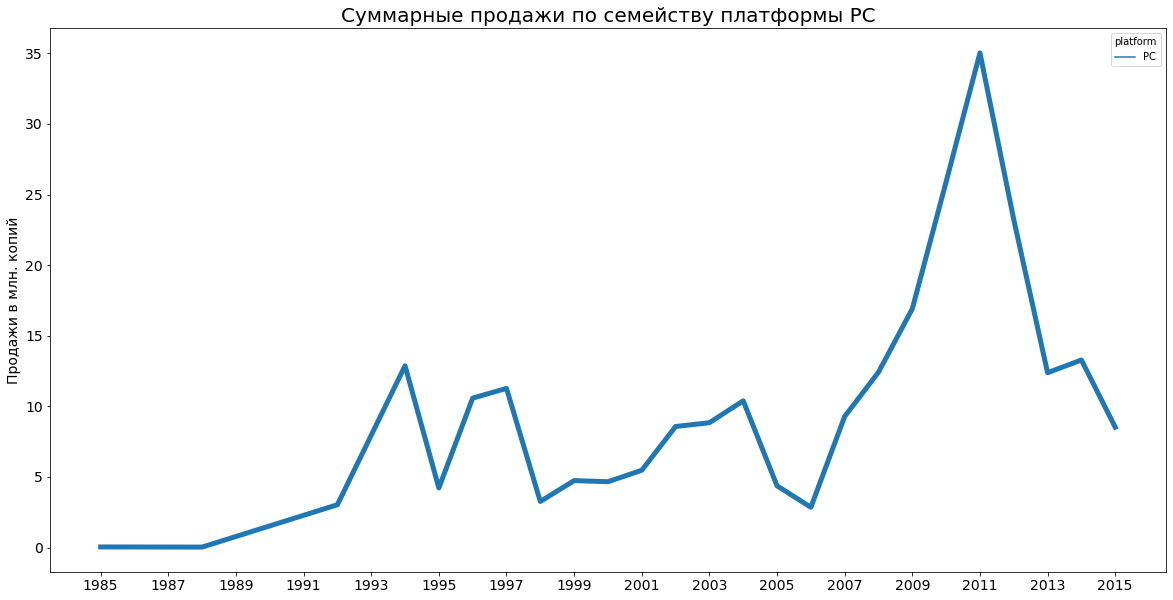

In [97]:
df_PC = df_years.query('platform == "PC"')
df_PC_pivot = df_PC.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index()
df_PC_pivot = df_PC_pivot.query('release_year < 2016')

plt.figure(figsize=(20, 10))

sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_PC_pivot)

plt.title('Суммарные продажи по семейству платформы PC', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

years = []

for i in range (1985, 2016, 2):
    years.append(i)
    
plt.xticks(years ,fontsize=14)
plt.yticks(fontsize=14);

**Ради исследовательского интереса столкнем на 1 графике лбами Сони и Майкрософт.**

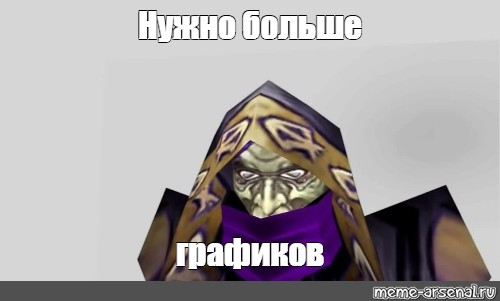

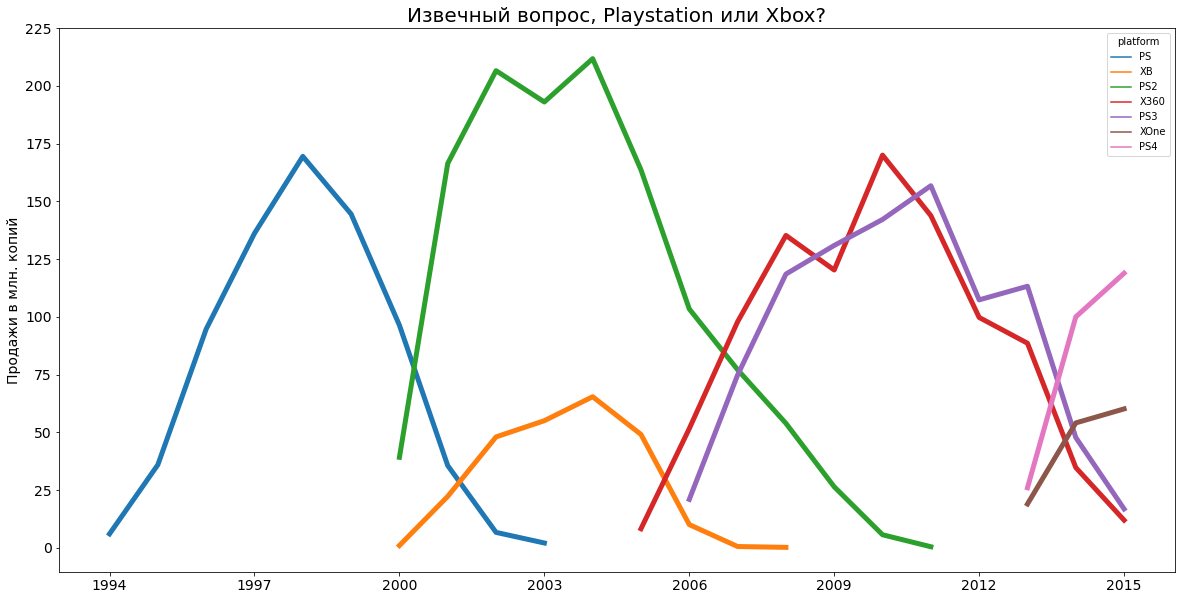

In [98]:
df_PCvsXB = df_years.query('(platform == "XB") or (platform == "X360") or (platform == "XOne") or (platform == "PS") or (platform == "PS2") or (platform == "PS3") or (platform == "PS4")')
df_PCvsXB_pivot = df_PCvsXB.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index().sort_values(by='release_year')
df_PCvsXB_pivot = df_PCvsXB_pivot.query('release_year < 2016')

plt.figure(figsize=(20, 10))

sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_PCvsXB_pivot, palette="tab10")

plt.title('Извечный вопрос, Playstation или Xbox?', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

years = []

for i in range (1994, 2016, 3):
    years.append(i)
    
plt.xticks(years, fontsize=14)

mln = []

for i in range (0, 230, 25):
    mln.append(i)

plt.yticks(mln, fontsize=14);

И финальный вопрос.
Коли у нас есть данные по принадлежности каждой консоли к поколению, посмотрим общую динамику поведения продаж в рамках поколения, что и покажет нам примерные границы и сроки циклов смены поколений.

Первым шагом добавим в таблицу df_years справочную таблицу df_platfroms_cat, а дальше - дело техники и группировки как в прошлых графиках, но уже по столбцу поколения. 

In [99]:
df_years_generation = df_years.merge(df_platfroms_cat, left_on = ['platform'], right_on= ['platform_short'],  how = 'left')

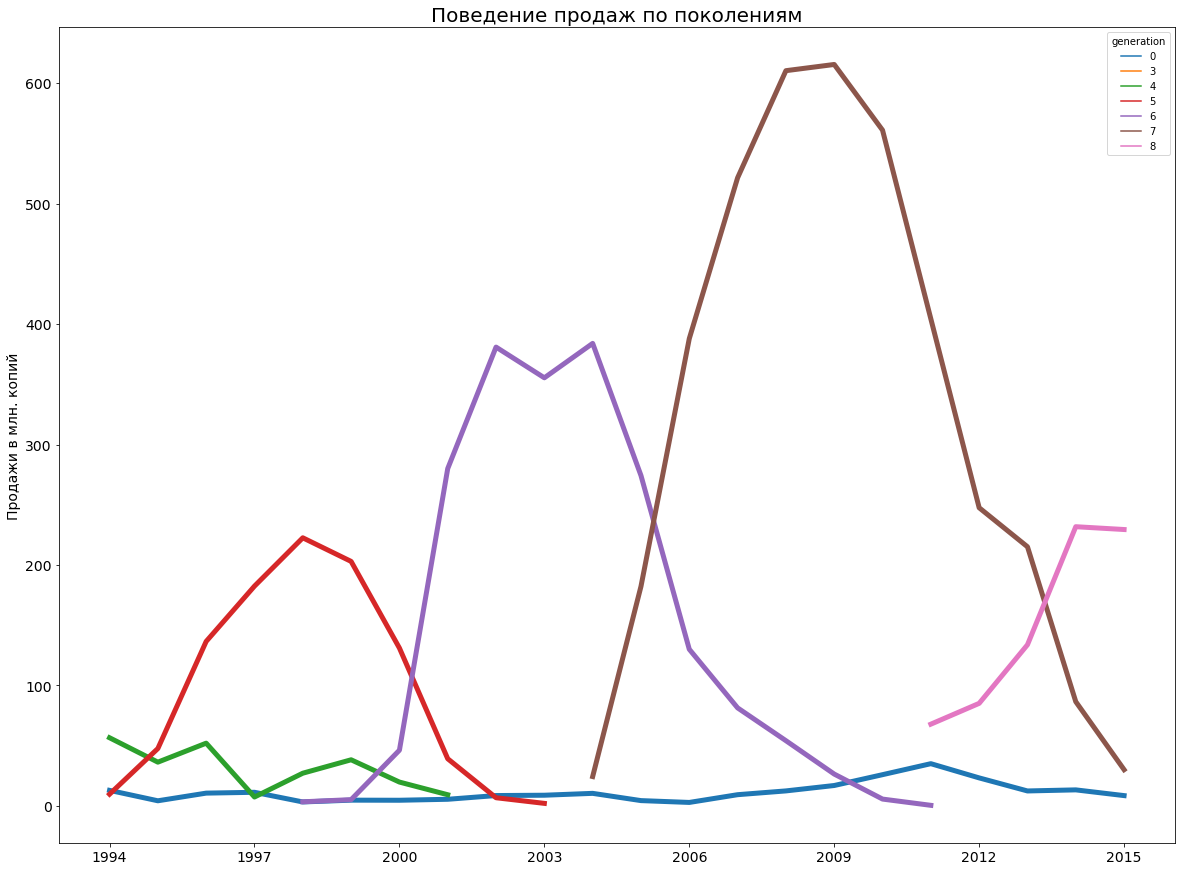

In [100]:
df_generation_pivot = df_years_generation.pivot_table(index=['generation', 'release_year'], values='sales', aggfunc='sum').reset_index().sort_values(by='release_year')
df_generation_pivot = df_generation_pivot.query('(release_year > 1993) and (release_year < 2016)')

plt.figure(figsize=(20, 15))

sns.lineplot(x='release_year', y='sales', hue='generation', linewidth=5, 
             data=df_generation_pivot, palette="tab10")

plt.title('Поведение продаж по поколениям', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

years = []

for i in range (1994, 2016, 3):
    years.append(i)
    
plt.xticks(years, fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

**Семейство PS:**
- средняя продолжительность цикла продаж одного поколения в районе 9-10 лет;
- цикл характеризуется резким ростом продаж после выпуска новой консоли на протяжении 3-5 лет и таким же резким затуханием, которое, однако, не сильно зависит от выхода новой консоли ( то есть затухание продаж начинается за несколько лет до выхода следующего поколения, однако темпы падения продаж не ускоряются в год выхода новой консоли, что объясняется тем, что люди в моменте не продают свои старые консоли и не покупают новыю, а также обратной совместимостью новых консолей (то есть на новую консоль можно купить игру с прошлого поколения ввиду более интересной цены);
- последнее поколение на момент анализа находится в стадии роста, с момента выхода прошло 3 года, поэтому возможно ожидать рост продаж до 18-19 года включительно. 

**Семейство Xbox:**
- средняя продолжительность цикла около 8-9 лет;
- поведение продаж аналогично семейству конкурентов PS;
- рост продаж в районе 3-4 лет с момента выхода консоли, прогнозируется рост как минимум на 2017 и 2018 года;

**Семейство Nintendo:**
- какого то общего паттерна среднего цикла не выявлено, разрыв выхода новых консолей не равномерный, если между GB и GBA прошло в районе 11 лет, то после GBA вышло новое поколение Nintendo DS через 3 года. Обновление на 8 поколение произошло через 7 лет;
- на декабрь 2016 имеется информация о выходе, в рамках все того же 8 поколения, новой консоли Nintendo Switch с планируемой датой старта продаж – март 2017 (данные от апреля 2016);
- также выявлены падения продаж по Nintendo 3DS, рекомендуется обратить внимание на рекламные компании игр к новой консоли после её выхода.

**Семейство Wii (Nintendo):**
- ситуация очень похожа с переносными консолями от Nintendo, а именно перестроение бизнес модели и ребрендинг консолей в 2000-2006 года;
- седьмое поколение Wii прожило цикл в 9 лет с резким ростом 3 года и плавным затуханием;
- новая консоль (WiiU) даже близко не приблизилась к успехам предшественницы и показывает темпы падения продаж 2015 к 2014 даже сильнее, чем Wii;
- в целом наблюдается, что Nintendo отдал сегмент настольных консолей на откуп Сони и Майкрософту, сосредоточившись на выпуске своей новой продукции и будущему развитию переносных консолей Switch.

**Отдельно хотелось бы упомянуть игры на PC.** У ПК-гейминга есть существенный минус, это развитый пиратский сервис по распространению игр, что и выливается в низких продажах игр на PC (порой разработчики даже не имеют желания делать порты игр с консолей на ПК из-за низкого выхлопа из-за пиратства). 
Однако я не рекомендую забывать про этот сегмент продаж и брать его во внимание в маркетинговых акциях. 
Да, продажи падают (впрочем, как и по другим консолям) с пиковых времен «золотого века» гейминга, однако ПК гейминг существует дольше всего и показывает стабильные значения еще с ранних 90-х. 
Также, всего будет сегмент геймеров, которым будут требоваться лицензионные копии (онлайн мультиплеерные игры), поэтому стабильные продажи в сегменте ПК все равно будут. 

**В гонке PS и Xbox хотелось бы отметить тотальную доминацию консолей от Сони.**
Причина этому кроется большее число игр на Сони, наличие на 1 поколение больше, то есть лояльная публика. 
И если в 7 поколении (PS3 – X360), Майкрософт смог навязать борьбу и даже в некоторые годы её выиграть, за счет не особо удачной версии PS3, а также наличия большого числа эксклюзивов на Xbox, то в 8 поколении Сони сделал оргвыводы и снова взял верх, начав продажи в 2013 году примерно на одном уровне с Майками, а потом вырвавшись в 2015 почти в 2.5 раза. 


**Отдельно хотелось бы отметить консолидированное поведение продаж игр по году выпуска в разрезе поколений консолей.**
Средний цикл смены поколения в районе 9-10 лет.
При этом для 8 поколения, пока что, рост не такой, воодушевляющий в сравнении с 7 или 6 поколением. 
В целом, складывается ощущение, что век платного гейминга потихоньку идет на закат. Конечно, данная оценка нерелевантная только на основе количества проданных копий, оценивать надо как стоимость продаж и выручку, так и в целом маржинальность бизнеса игровой индустрии.
Однако, если опираться на опыт происходящего в игровой индустрии на 2022 год, в целом, мысль о консолидации компаний, закрытии или скупки мелких игровых студий, уменьшении числа выпускаемых проектов – верная. 
Выпуск игр — это теперь не порадовать геймера, а чисто финансовый расчет, поэтому и подходы к выпуску игр, развитию проектов и работе компаний – тоже чисто меркантильный. 


<a id='33'></a>
### Выбираем актуальный период для прогнозирования

С учетом анализа в прошлом разделе, считаю релевантным взять период прогнозирования как начало выпуска 8 поколения с 2012 года, по 2015. 
2016 год не берем в расчет, т.к. выгрузка у нас на момент 2016, поэтому данные по продажам игр, выпущенных в 2016 году, могут иметь неполные продажи (учитывая, что в некоторых регионах эти игры могли вообще еще не выйти). 

Также, на 2015 год уровень продаж примерно сопоставим с уровнем 2001 года, таким образом в промежуток 2001-2015 года почти полностью попадает цикл смены двух поколений консолей (6-7) и начало роста 8 поколения. 



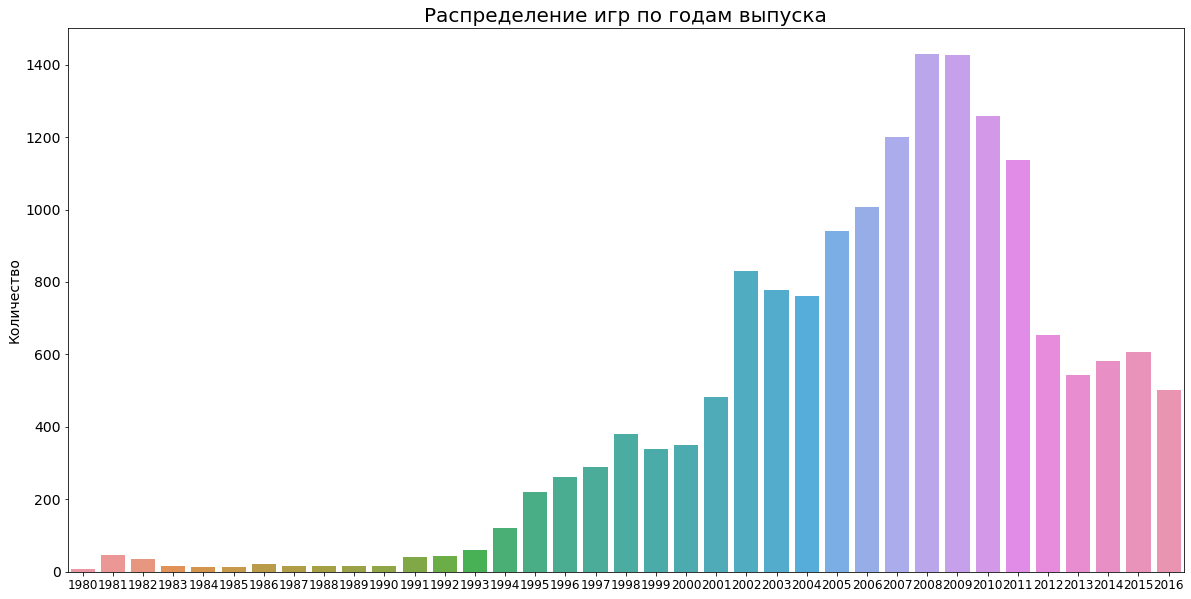

In [101]:
#График распределения игр

df_years_pivot = df_years.pivot_table(index='release_year', values='sales', aggfunc='count').reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(x='release_year', y='sales', data=df_years_pivot)


plt.title('Распределение игр по годам выпуска', fontsize=20)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

In [102]:
df_years = df_years.query('(release_year > 2011) and (release_year < 2016)')
df_years['release_year'].describe().apply(lambda x: format(x, '.0f'))

count    2384
mean     2013
std         1
min      2012
25%      2012
50%      2013
75%      2015
max      2015
Name: release_year, dtype: object

In [103]:
print(2384 / 17615)

0.13533919954584162


**Вывод**

Итак, у нас есть новая переменная с актуальным временным промежутком для анализа df_years.

<a id='34'></a>
### Выбор потенциально прибыльных платформ

Повторим график по всем платформам и взглянем на статистику. 

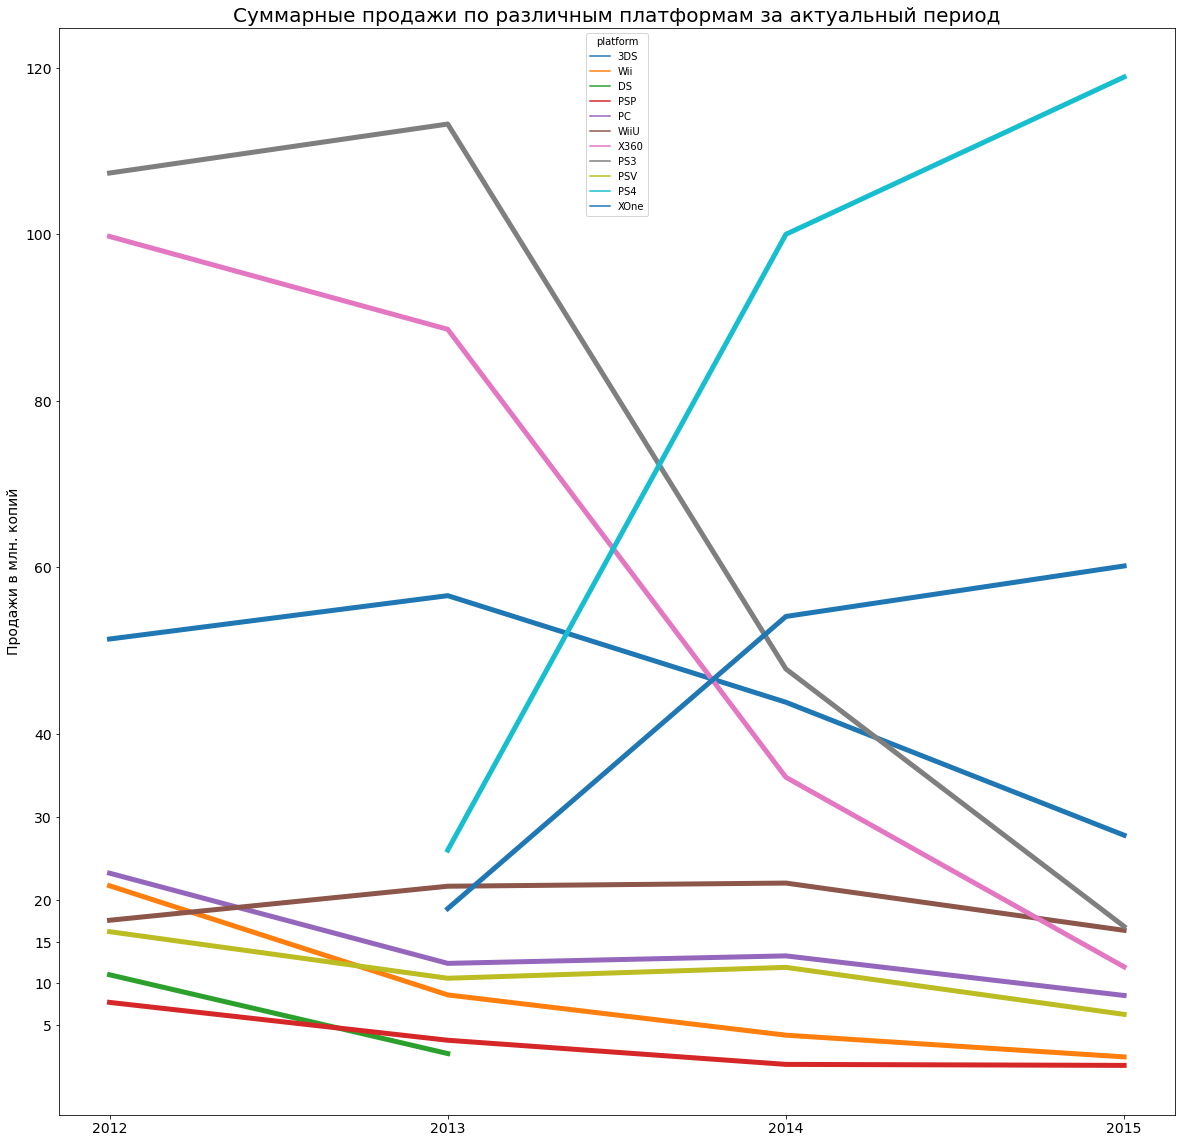

In [104]:
df_years_pivot = df_years.pivot_table(index=['platform', 'release_year'], values='sales', aggfunc='sum').reset_index().sort_values(by='release_year')

plt.figure(figsize=(20, 20))

sns.lineplot(x='release_year', y='sales', hue='platform', linewidth=5, 
             data=df_years_pivot, palette="tab10")

plt.title('Суммарные продажи по различным платформам за актуальный период', fontsize=20)
plt.ylabel('Продажи в млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks([2012, 2013, 2014, 2015], fontsize=14)
plt.yticks([5, 10, 15, 20, 30, 40, 60, 80, 100, 120],fontsize=14);

**Вывод**

Как уже говорилось в выводе к разделу 3.2, предлагается взять потенциально 3 прибыльные платформы.
А именно растущие 8 поколения PS4 и Xbox One, а также стабильно существующий PC гейминг. 

<a id='35'></a>
### Дальнейший анализ платформ

Создадим график "ящик с усами" по выбранным выше платформам, а также добавим прошлые поколения (PS3 и X360) как отжившие свое, но показательные в части статистики.

In [105]:
df_years.head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,53,M,13.79


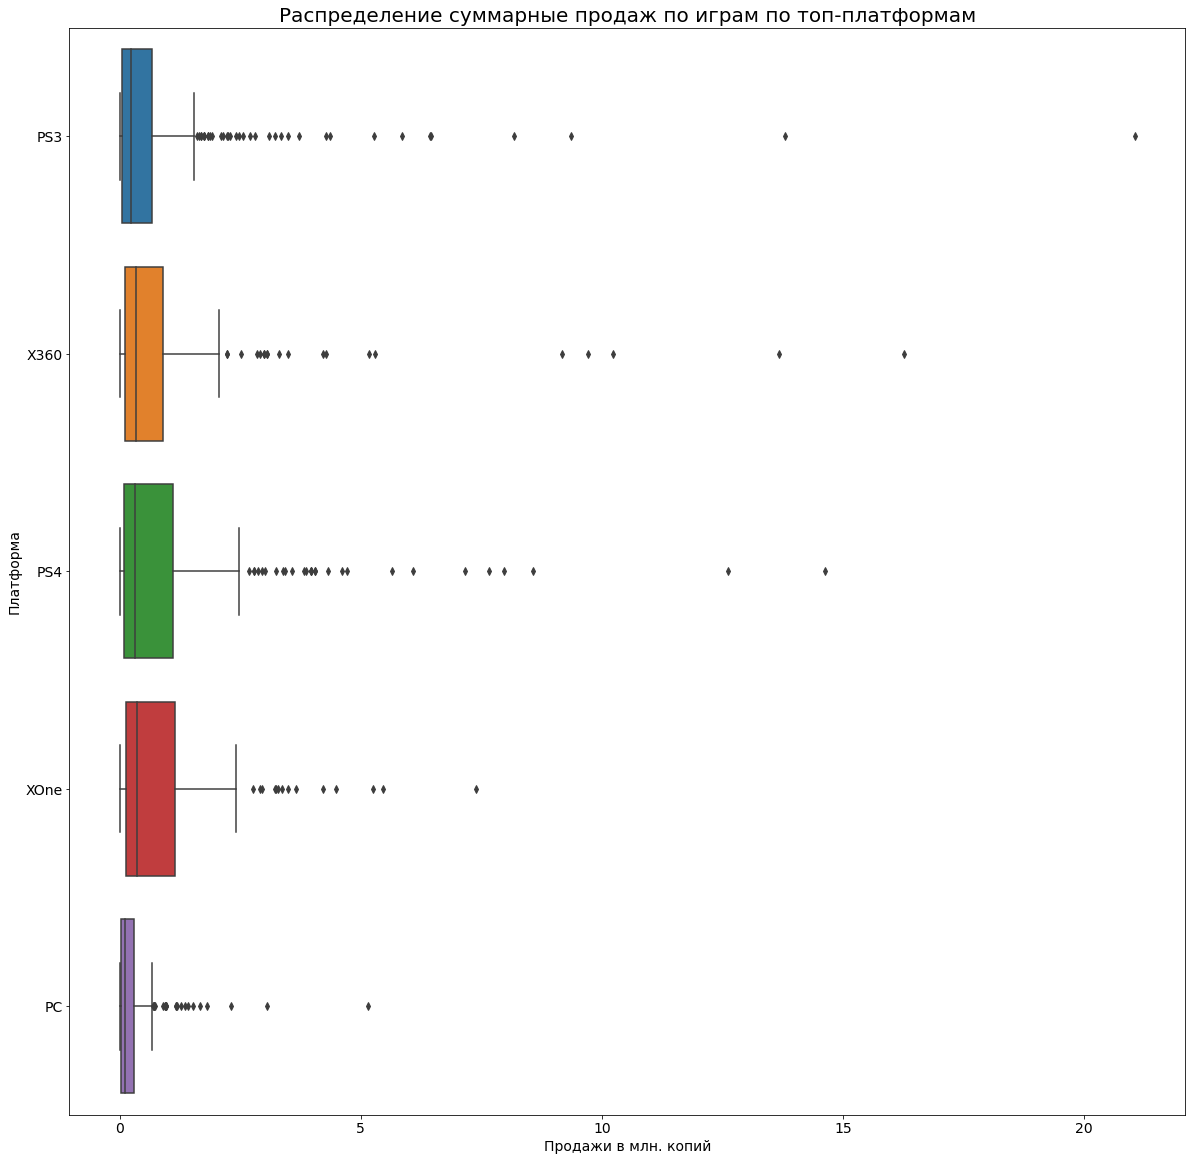

In [106]:
top_platforms = df_years.query('(platform == "PS3") or (platform == "PS4") or (platform == "X360") or (platform == "XOne") or (platform == "PC")')
plt.figure(figsize=(20, 20))

sns.boxplot(y="platform", x="sales", data=top_platforms, orient="h")

plt.title('Распределение суммарные продаж по играм по топ-платформам', fontsize=20)
plt.ylabel('Платформа', fontsize=14)
plt.xlabel('Продажи в млн. копий', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Хорошо, а если убрать игры с низкими продажами (скажем менее 1 млн копий).

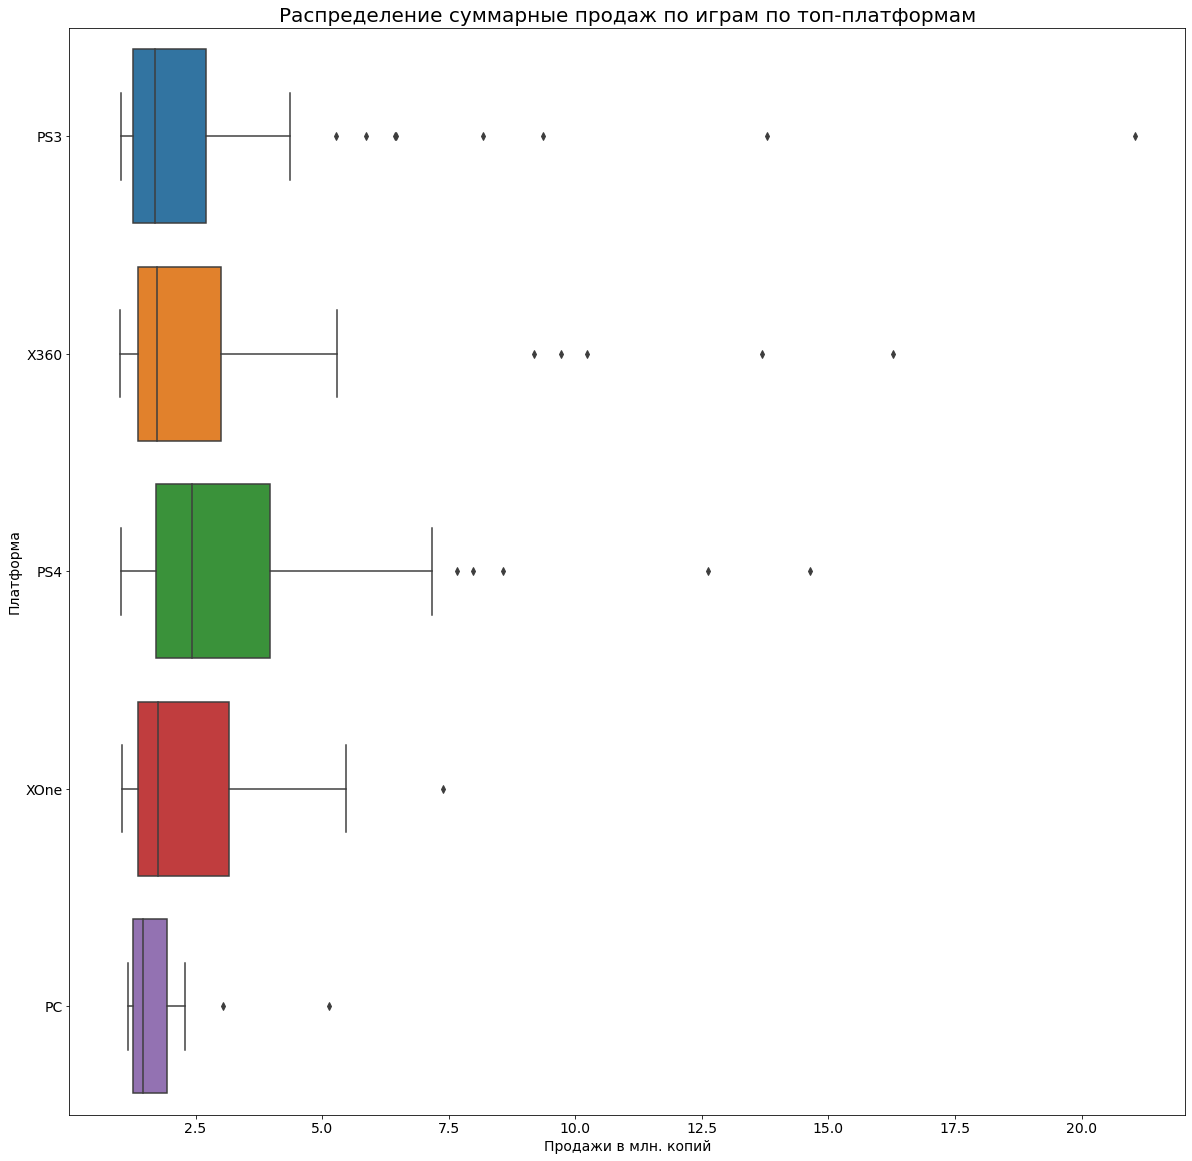

In [107]:
top_platforms = top_platforms.query('sales > 1')

plt.figure(figsize=(20, 20))

sns.boxplot(y="platform", x="sales", data=top_platforms, orient="h")

plt.title('Распределение суммарные продаж по играм по топ-платформам', fontsize=20)
plt.ylabel('Платформа', fontsize=14)
plt.xlabel('Продажи в млн. копий', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

Наиболее успешные игры замечены у Xbox 360 и PS3.
При этом средняя по продажам и квартили распределены примерно одинаково. 
Иная картинка по 8 поколению. PS4 имеет несколько игр перешагнувших порог в 10 млн копий, а также 6 игр между 5 и 10 млн. В свою очередь конкурент может похвастаться только 3 играми между 5 и 10 млн.
Средняя и квартили опять же одинаковые.
У Пк гейминга не все так сладко. Имеется множество игр, выходящих за пределы Q3 + 1.5IQR, однако в целом сам ПК гейминг достаточно слаб по продажам.

В свою очередь, если отфильтровать по играм с продажами свыше 1 млн. копий, то картина по 8 поколению еще больше в пользу платформы от Сони. И 3 квартиль и граница правого «уса» на 1.5-2 млн. копий дальше, чем у конкурента. 
В свою очередь ситуация по 7 поколению между PS и Xb чуть более одинаковая, тотальной доминации Сони нет, имеется даже незначительный отрыв у Xbox. 

Ну а ПК гейминг все также находится позади)
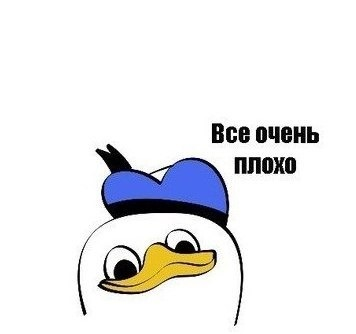

<a id='36'></a>
### Влияние отзывов на продажи по платформам

Взглянем на распределение топ платформ по продажам с учетом нового промежутка анализа (2012-2015 года)

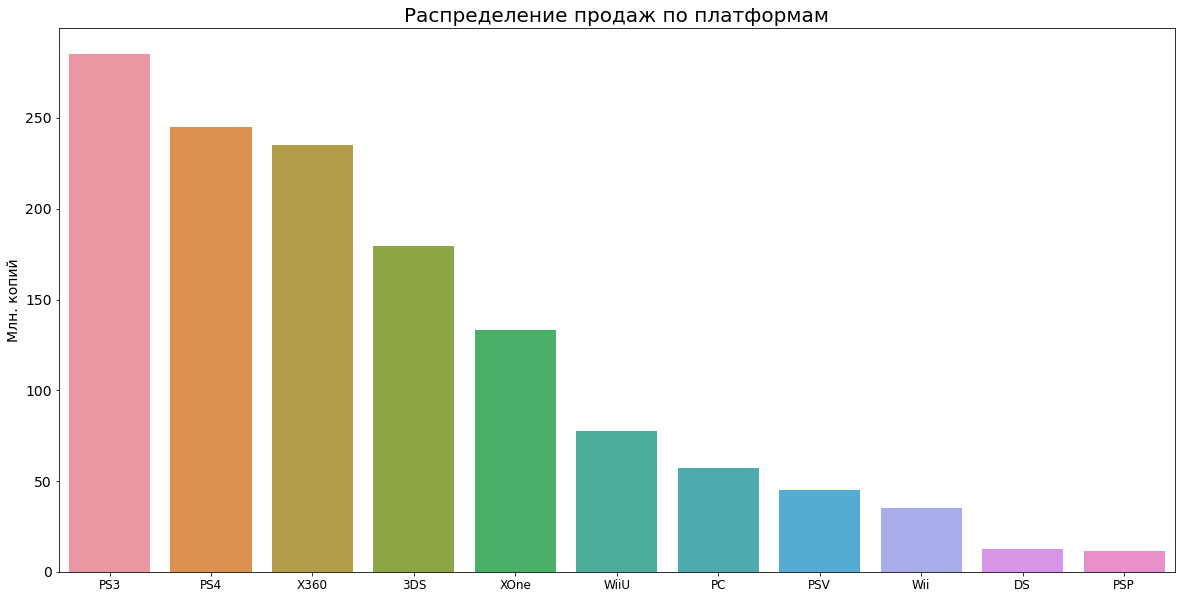

In [108]:
platforms = df_years.pivot_table(index='platform', values='sales', aggfunc='sum').reset_index().sort_values(by='sales', ascending=False)
platforms.columns = ['platform', 'total_sales']

plt.figure(figsize=(20, 10))
sns.barplot(x='platform', y='total_sales', data=platforms)


plt.title('Распределение продаж по платформам', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14);

С учетом анализа актуального периода и консолей последнего поколения, возьмем за базу для анализа PS4  и в дальнейшем сравним результаты с XOne и PC.

В рамках соотнесения удасться сравнить поведение потребителей в разрезе двух конкурирующих консолей. 

При этом стоит отметить, что в данном периоде еще сильны продажи "затухающего" поколения конселей, ПС3 и X360, каждая из них превосходит своего предшественника по данным на 2015 год (то есть 2 года после запуска консолей 8 поколения на рынок). 
**Так же следует отметить возможное искажение результатов из-за обратной совместимости консолей (на ПС4 можно играть дисками от ПС3), что на начальном этапе сильно скажется на продажах игр для консолей нового поколения.** 

####  Влияние оценок на продажи PS4

In [109]:
df_corr_ps4 = df_years.query('platform == "PS4"')
df_corr_ps4 = df_corr_ps4[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales', 'critic_score', 'user_score']]
df_corr_ps4.corr()

,na_sales,eu_sales,jp_sales,other_sales,sales,critic_score,user_score
na_sales,1.000000,0.810579,0.530825,0.953340,0.939381,0.189826,0.092334
eu_sales,0.810579,1.000000,0.539344,0.948770,0.961354,0.198335,0.095024
jp_sales,0.530825,0.539344,1.000000,0.562439,0.588567,0.075230,0.053261
other_sales,0.953340,0.948770,0.562439,1.000000,0.998291,0.199771,0.096040
sales,0.939381,0.961354,0.588567,0.998291,1.000000,0.202074,0.098044
critic_score,0.189826,0.198335,0.075230,0.199771,0.202074,1.000000,0.927218
user_score,0.092334,0.095024,0.053261,0.096040,0.098044,0.927218,1.000000


In [110]:
df_corr_ps4.shape

(228, 7)

In [111]:
df_corr_ps4 = df_corr_ps4.query('(critic_score > 0) and (user_score > 0)')

In [112]:
df_corr_ps4.shape

(153, 7)

In [113]:
df_corr_ps4.corr()

,na_sales,eu_sales,jp_sales,other_sales,sales,critic_score,user_score
na_sales,1.000000,0.733715,0.493806,0.924469,0.904122,0.441026,0.029242
eu_sales,0.733715,1.000000,0.519858,0.936236,0.952721,0.369818,-0.007356
jp_sales,0.493806,0.519858,1.000000,0.545088,0.573951,0.308805,0.224769
other_sales,0.924469,0.936236,0.545088,1.000000,0.997718,0.433477,0.015884
sales,0.904122,0.952721,0.573951,0.997718,1.000000,0.430777,0.018139
critic_score,0.441026,0.369818,0.308805,0.433477,0.430777,1.000000,0.612451
user_score,0.029242,-0.007356,0.224769,0.015884,0.018139,0.612451,1.000000


При анализе влияние оценок на продажи логичнее брать те игры, по которым есть оценки критиков и игроков (оценка больше 0, т.к. все пропуски мы заполнили как 0).

Таким образом, при фильтрации датасета по платформе PS4 мы видим незначительное сокращение данных, к большинству игр отзывы и оценки имеются.

**Выводы по результатам:**
 - существенного влияния на продажи оценки критиков и игроков не оказывают, связь с оценками критиков - слабая, с оценками пользователей - очень слабая.
 - наиболее "зависимый" регион от оценок - США, наименее зависимые - Европа и Япония. 
 - Что интересно, между собой оценки критиков и игроков коррелируют средне, при этом надо помнить, что коэфф-т корреляции Пирсона это коэфф-т линейной связи. Ее отсутствие не влечет отсутствие связи как таковой, поскольку последняя может быть нелинейной. Взглянем дополнительно на график зависимости средних продаж от оценки пользователей и критиков.

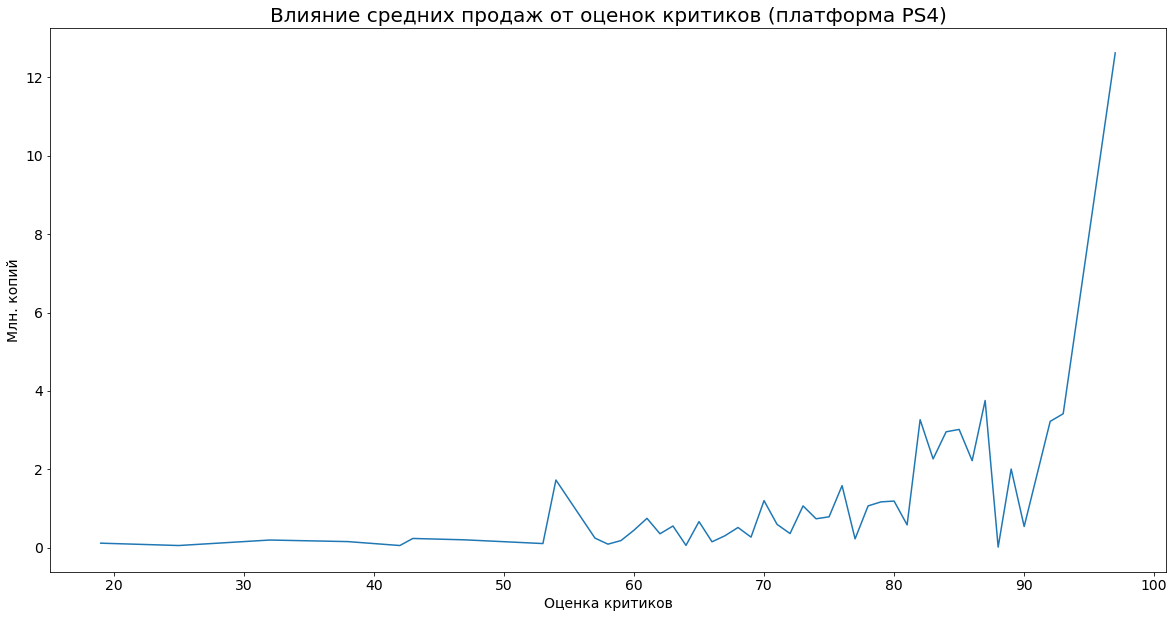

In [114]:
plt.figure(figsize=(20, 10))

df_corr_ps4.groupby('critic_score')['sales'].mean().plot()


plt.title('Влияние средних продаж от оценок критиков (платформа PS4)', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

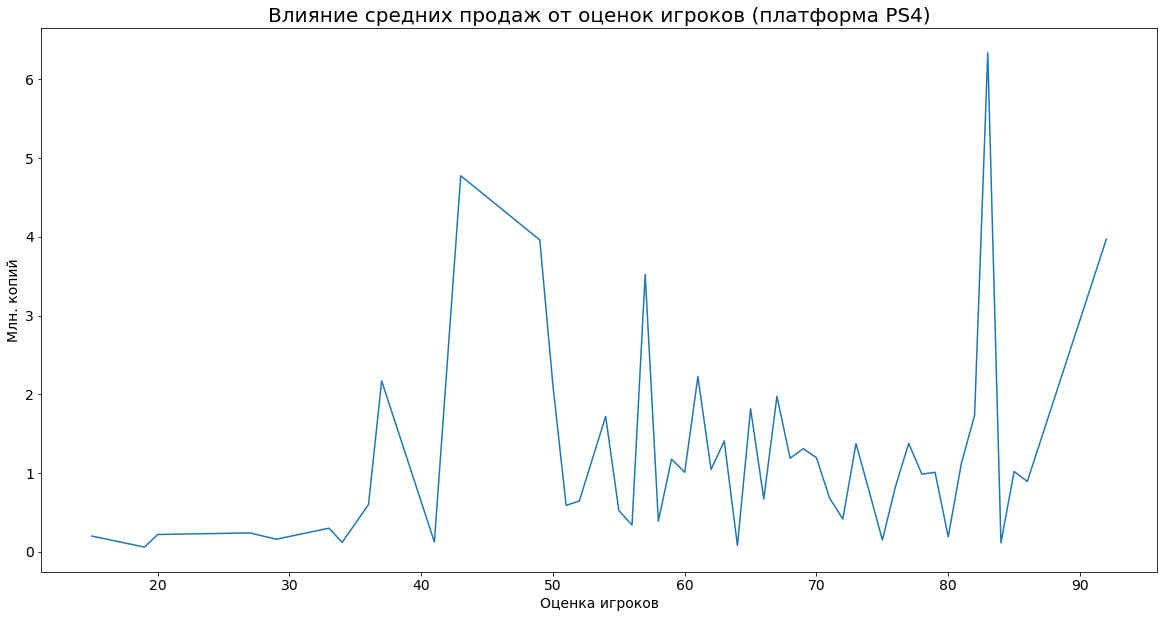

In [115]:
plt.figure(figsize=(20, 10))

df_corr_ps4.groupby('user_score')['sales'].mean().plot()


plt.title('Влияние средних продаж от оценок игроков (платформа PS4)', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Оценка игроков', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [116]:
df_years.query('(user_score > 30) and (user_score < 60) and (platform == "PS4")').head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,43,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,57,M,7.66
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,57,E,6.08
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70,49,M,3.96
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78,37,M,3.83


Если в оценках критиков можно заметить хоть какую то зависимость (например плохие игры не продаются и имеется рост к 80-90 баллам), то поведение оценок пользователей и продажи коррелируют достаточно слабо. Интересный выброс и объеме продаж на 25 баллах, что больше чем продажи на промежутке 30-70 баллов. 

####  Влияние оценок на продажи Xbox One

In [117]:
df_corr_xone = df_years.query('platform == "XOne"')
df_corr_xone = df_corr_xone[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales', 'critic_score', 'user_score']]
df_corr_xone = df_corr_xone.query('(critic_score > 0) and (user_score > 0)')
df_corr_xone.shape

(107, 7)

In [118]:
df_corr_xone.corr()

,na_sales,eu_sales,jp_sales,other_sales,sales,critic_score,user_score
na_sales,1.000000,0.702490,0.391890,0.984611,0.962145,0.419905,-0.057912
eu_sales,0.702490,1.000000,0.409303,0.813868,0.869812,0.417535,-0.030964
jp_sales,0.391890,0.409303,1.000000,0.415763,0.433173,0.249497,0.111230
other_sales,0.984611,0.813868,0.415763,1.000000,0.994200,0.444147,-0.055336
sales,0.962145,0.869812,0.433173,0.994200,1.000000,0.451360,-0.051243
critic_score,0.419905,0.417535,0.249497,0.444147,0.451360,1.000000,0.499502
user_score,-0.057912,-0.030964,0.111230,-0.055336,-0.051243,0.499502,1.000000


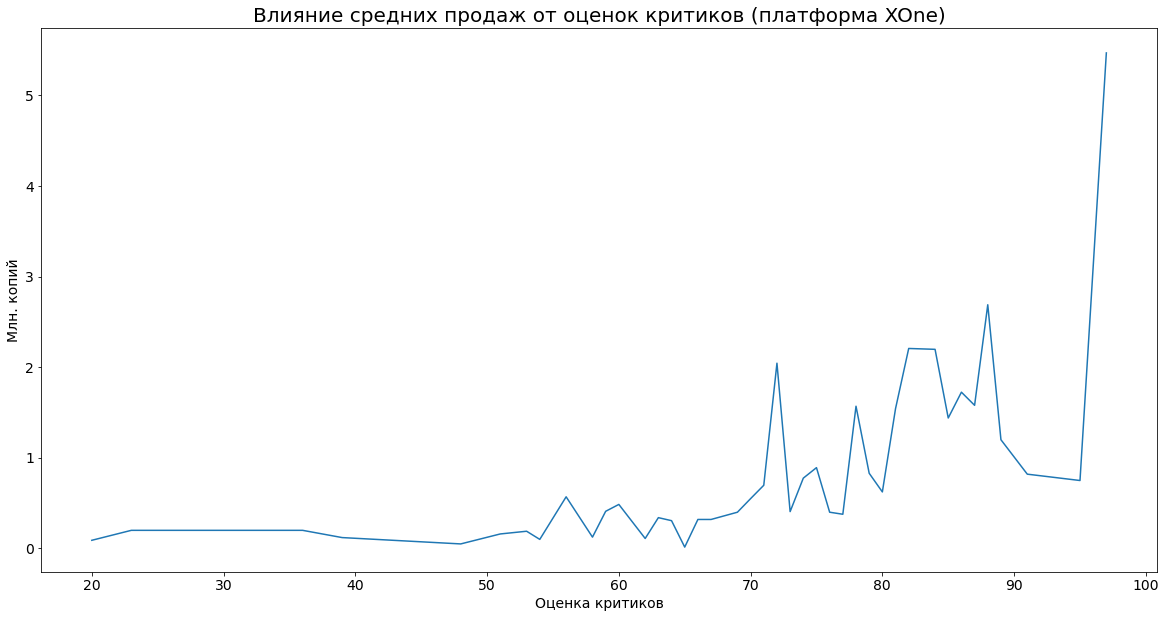

In [119]:
plt.figure(figsize=(20, 10))

df_corr_xone.groupby('critic_score')['sales'].mean().plot()


plt.title('Влияние средних продаж от оценок критиков (платформа XOne)', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

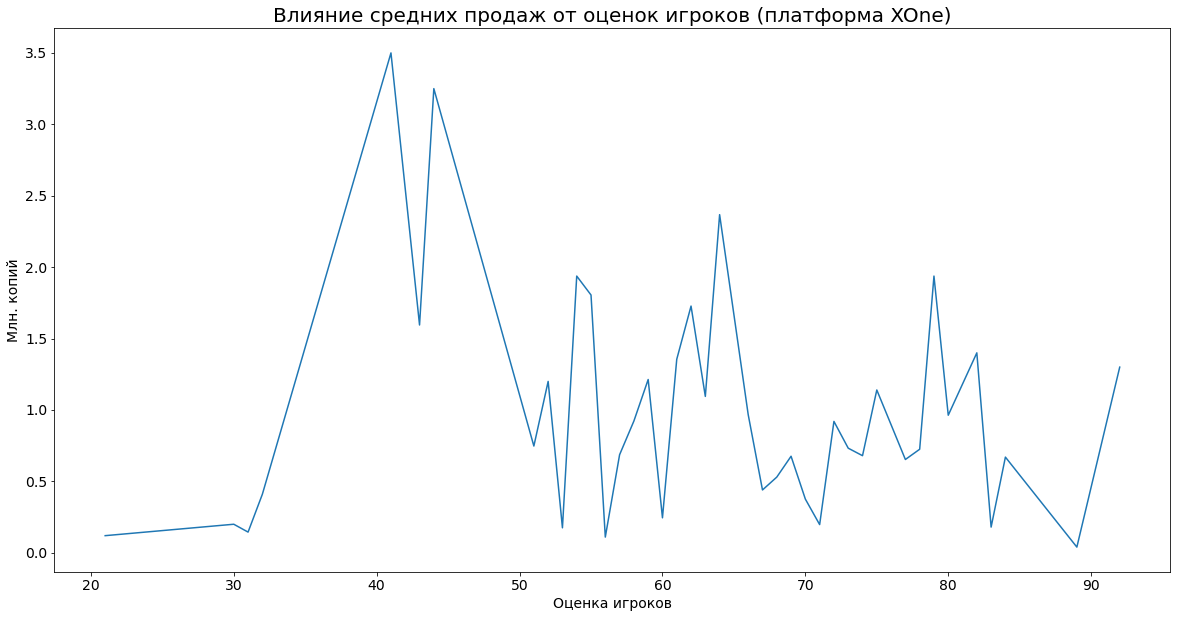

In [120]:
plt.figure(figsize=(20, 10))

df_corr_xone.groupby('user_score')['sales'].mean().plot()


plt.title('Влияние средних продаж от оценок игроков (платформа XOne)', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Оценка игроков', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [121]:
df_years.query('(user_score > 30) and (user_score < 50) and (platform == "XOne")').head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.0,0.33,72,41,M,3.50
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.0,0.24,84,44,E,3.25
493,Call of Duty: Ghosts,XOne,2013,Shooter,1.88,0.77,0.0,0.27,78,43,M,2.92
4691,NHL 15,XOne,2014,Sports,0.31,0.06,0.0,0.04,59,32,E10+,0.41
6322,Rory McIlroy PGA Tour,XOne,2015,Action,0.16,0.09,0.0,0.02,60,43,E,0.27


####  Влияние оценок на продажи PC

In [122]:
df_corr_pc = df_years.query('platform == "PC"')
df_corr_pc = df_corr_pc[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales', 'critic_score', 'user_score']]
df_corr_pc = df_corr_pc.query('(critic_score > 0) and (user_score > 0)')
df_corr_pc.shape

(152, 7)

In [123]:
df_corr_pc.corr()

,na_sales,eu_sales,jp_sales,other_sales,sales,critic_score,user_score
na_sales,1.000000,0.847631,NaN,0.921049,0.955060,0.235497,-0.160797
eu_sales,0.847631,1.000000,NaN,0.930631,0.966072,0.265317,-0.192233
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,0.921049,0.930631,NaN,1.000000,0.970708,0.251198,-0.159737
sales,0.955060,0.966072,NaN,0.970708,1.000000,0.261372,-0.182729
critic_score,0.235497,0.265317,NaN,0.251198,0.261372,1.000000,0.420645
user_score,-0.160797,-0.192233,NaN,-0.159737,-0.182729,0.420645,1.000000


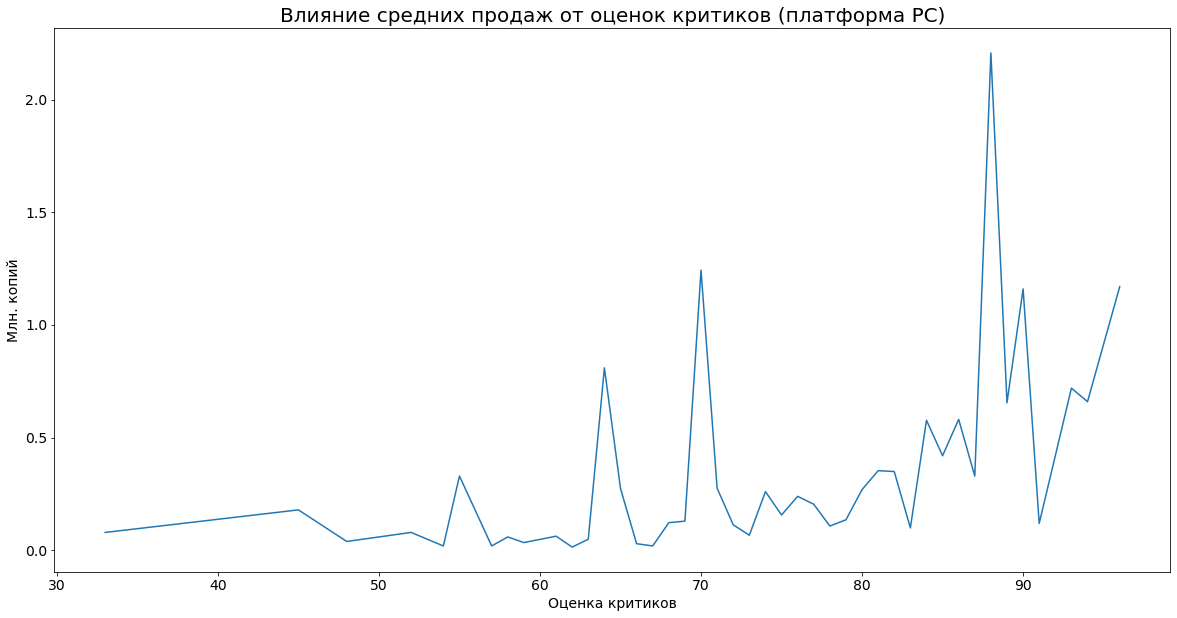

In [124]:
plt.figure(figsize=(20, 10))

df_corr_pc.groupby('critic_score')['sales'].mean().plot()


plt.title('Влияние средних продаж от оценок критиков (платформа PC)', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

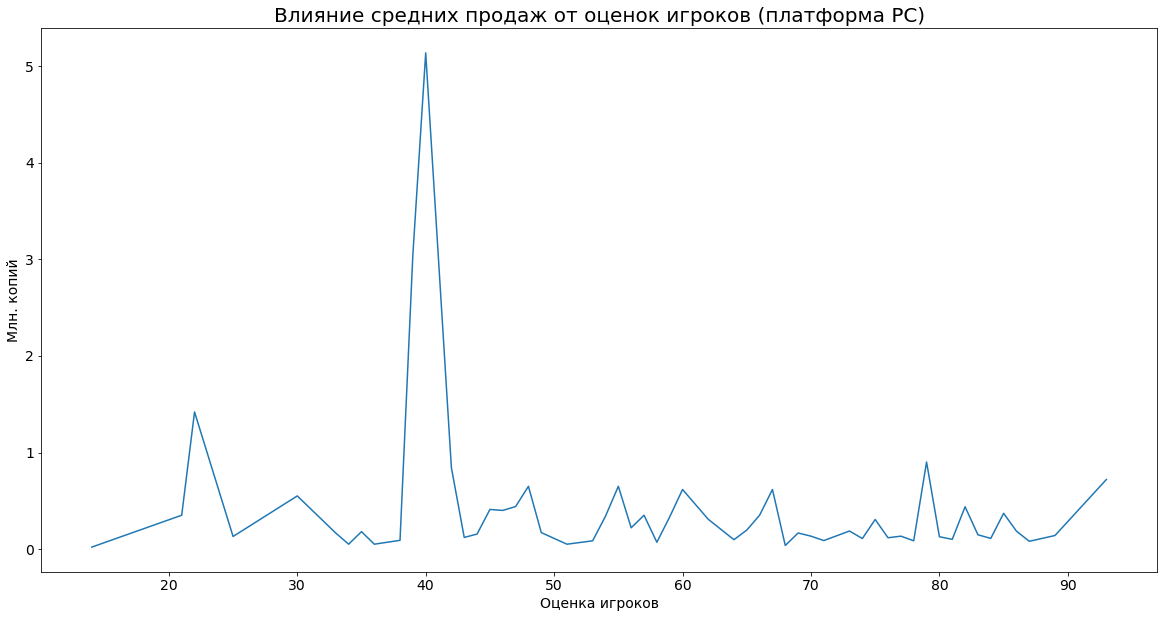

In [125]:
plt.figure(figsize=(20, 10))

df_corr_pc.groupby('user_score')['sales'].mean().plot()


plt.title('Влияние средних продаж от оценок игроков (платформа PC)', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Оценка игроков', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [126]:
df_years.query('(user_score > 20) and (user_score < 40) and (platform == "PC")').head(5)

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,39,T,3.05
1351,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64,22,E10+,1.42
3652,Assassin's Creed: Unity,PC,2014,Action,0.18,0.33,0.0,0.04,70,30,M,0.55
5379,Company of Heroes 2,PC,2013,Strategy,0.06,0.25,0.0,0.04,80,21,M,0.35
6682,Need for Speed Rivals,PC,2013,Racing,0.04,0.19,0.0,0.02,76,33,E10+,0.25


**Вывод**

В целом, по консолям поколения 8 картина схожая. Средняя или слабая зависимость от оценок критиков и игроков, невнятная картина на графиках. 
Однако опять же выделяется пиками на оценках 30-50 от пользователей.
И о чудо, в случае Сони и Майкрософт в топе находzтся конвеерные франшизы Call Of Duty, FIFA и Assassin`s Creed. 
Что интересно, оценки игроков и критиков значительно различаются. Однако и продажи колоссальные. Ежики продолжают хаять игры, но кактус все равно едят. 

По PC не все так очевидно. И если картина с завиисимостью примерно одинаковая (вернее даже отрицательная зависимость из-за высоких продаж игр с низким рейтингом (таблица выше), то вкусы ПК геймеров несколько иные. В топ попали Симсы и градостроительный симулятор SimCity. Видимо CoD и иные франшизы ПК геймеры препочитают скачивать с торрентов))

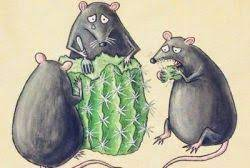

<a id='37'></a>
### Распределение игр по жанрам

Выделим картину распределения продаж по жанрам в 2 этапа.
Первым, оценим продажи по жанрам и платформам.
Вторым, только по жанрам. 

In [127]:
df_years

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,53,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,0,0,0,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,0,0,T,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,0,0,0,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,76,M,0.01


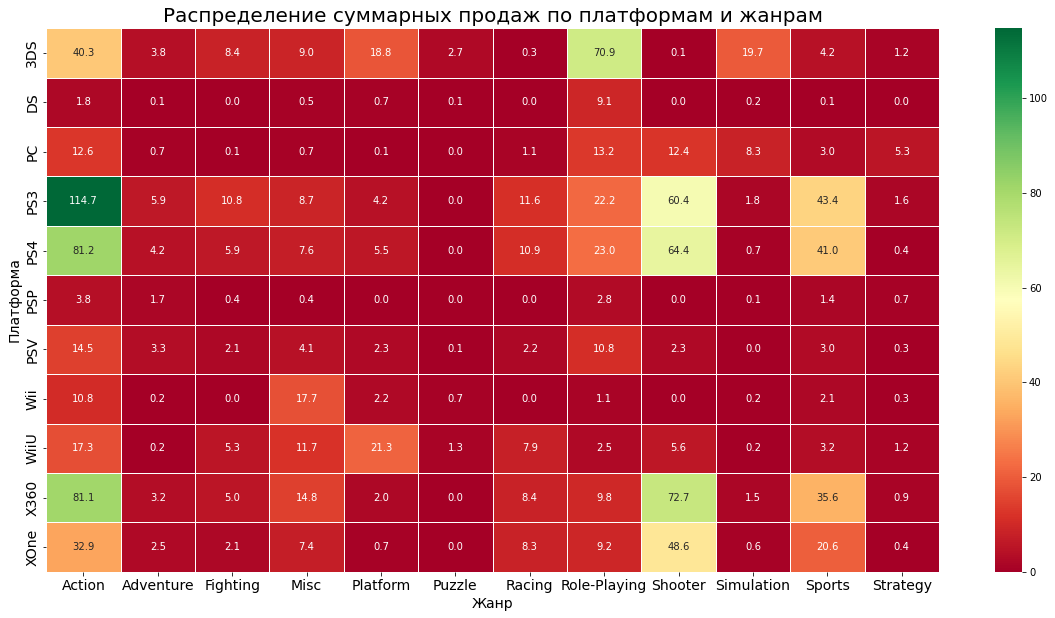

In [128]:
df_genre = df_years.pivot_table(index='platform', columns='genre', values='sales', aggfunc=sum).fillna(0)

plt.figure(figsize=(20, 10))

sns.heatmap(df_genre, annot=True, fmt=".1f", linewidths=.5, cmap="RdYlGn")

plt.title('Распределение суммарных продаж по платформам и жанрам', fontsize=20)
plt.ylabel('Платформа', fontsize=14)
plt.xlabel('Жанр', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

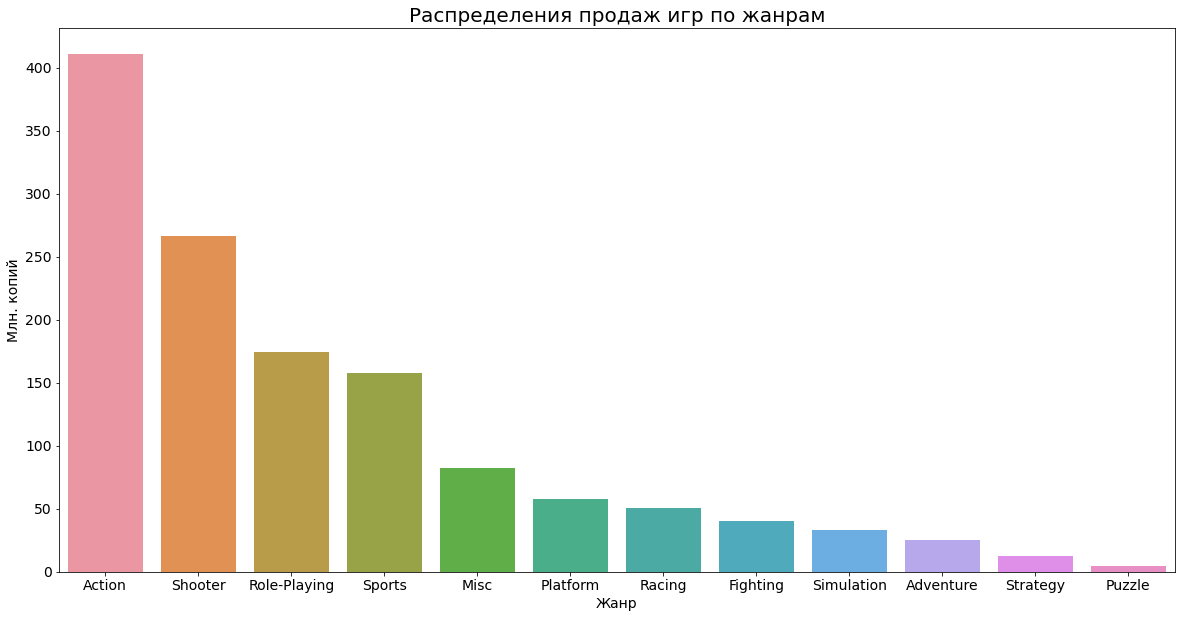

In [129]:
df_genre = df_years.pivot_table(index='genre', values='sales', aggfunc=sum).reset_index().sort_values(by='sales', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='genre', y='sales', data=df_genre)


plt.title('Распределения продаж игр по жанрам', fontsize=20)
plt.ylabel('Млн. копий', fontsize=14)
plt.xlabel('Жанр', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

Самым продаваемым жанром является Экшен игры. Второе место, с неплохим отрывом почти в 150 млн. копий – шутеры. Замыкают тройку жанр РПГ. 

Самые слабо продаваемые жанры — это стратегии и пазлы. Видимо думать обычный геймер не очень любит, легче нажимать пару кнопок в стрелялках. 

Что интересно, более 50% продаж самого популярного жанра (Экшен) формирует 3 платформы, PS4 и 3, а также Xbox 360.

Самые слабо продаваемые жанры спасаются за счет Пк гейминга (5,3 млн. продаж Стратегий), а также переносных платформ (DS) в жанре Пазл. 

Из интересного, Nintendo 3DS формирует большую часть рынка РПГ чем остальные консоли вместе взятые. Видимо играет роль популярность так называемых JRPG. Ох уж эти японцы. 

<a id='4'></a>
## Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
-	Самые популярные платформы (топ-5). Опишите различия в долях продаж.
-	Самые популярные жанры (топ-5). Поясните разницу.
-	Влияет ли рейтинг ESRB на продажи в отдельном регионе?



<a id='41'></a>
### Популярность платформ по регионам

In [130]:
df_years

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,0,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,53,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,0,0,0,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,0,0,T,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,0,0,0,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,76,M,0.01


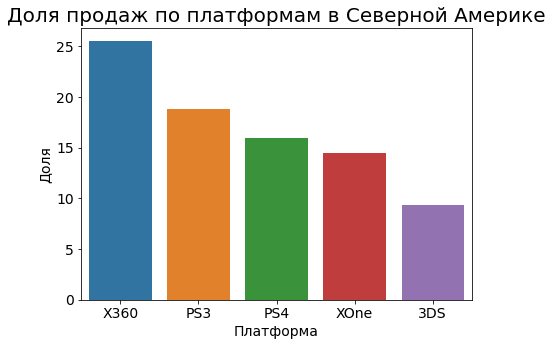

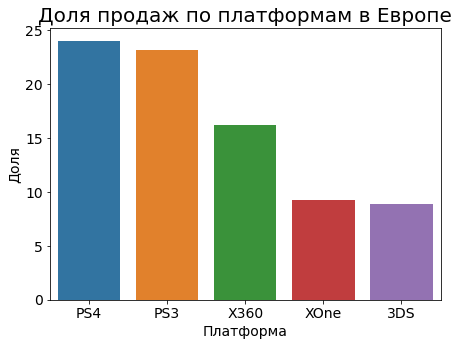

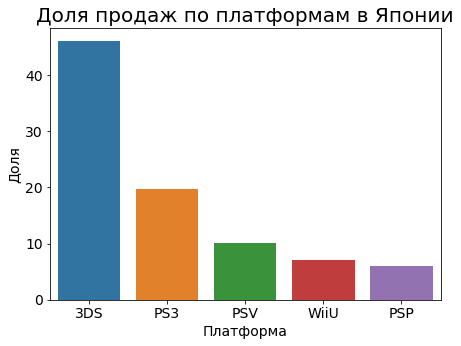

In [131]:
#Формируем сводную таблицу с группировко по платформе и суммирование продаж в NA

df_na_sale = df_years.pivot_table(index='platform', values='na_sales', aggfunc=sum).reset_index().sort_values(by='na_sales', ascending=False)

#Рассчитываем сумму продаж в NA

na_sum = df_na_sale['na_sales'].sum()

#Формируем столбец с пропорцией продаж по платформе к сумме продаж
df_na_sale['proportion'] = df_na_sale['na_sales'] / na_sum * 100
df_na_sale['proportion'] = df_na_sale['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

#Выводим график топ-5 продаж

plt.figure(figsize=(7, 5))
sns.barplot(x='platform', y='proportion', data=df_na_sale.head(5))

plt.title('Доля продаж по платформам в Северной Америке', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Платформа', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#Повторим для двух других регионов
df_eu_sale = df_years.pivot_table(index='platform', values='eu_sales', aggfunc=sum).reset_index().sort_values(by='eu_sales', ascending=False)

eu_sum = df_eu_sale['eu_sales'].sum()

df_eu_sale['proportion'] = df_eu_sale['eu_sales'] / eu_sum * 100
df_eu_sale['proportion'] = df_eu_sale['proportion'].apply(lambda x: format(x, '.2f')).astype('float')


plt.figure(figsize=(7, 5))
sns.barplot(x='platform', y='proportion', data=df_eu_sale.head(5))

plt.title('Доля продаж по платформам в Европе', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Платформа', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#Япония
df_jp_sale = df_years.pivot_table(index='platform', values='jp_sales', aggfunc=sum).reset_index().sort_values(by='jp_sales', ascending=False)

jp_sum = df_jp_sale['jp_sales'].sum()

df_jp_sale['proportion'] = df_jp_sale['jp_sales'] / jp_sum * 100
df_jp_sale['proportion'] = df_jp_sale['proportion'].apply(lambda x: format(x, '.2f')).astype('float')


plt.figure(figsize=(7, 5))
sns.barplot(x='platform', y='proportion', data=df_jp_sale.head(5))

plt.title('Доля продаж по платформам в Японии', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Платформа', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

Что и следовало ожидать, доля продаж по платформам подтверждает некоторую поддержку отечественной продукции.
Так, в NA наиболее популярная платформа — это «родная» Xbox 360.

А в Европе наиболее популярны 2 итерации продукции от Сони.

В свою очередь в Японии заметен перекос в поддержку продукции от Нинтендо и Сони, и отсутствие в топ-5 Xbox. А также перекос в сторону компактных платформ (3 из 5 в топе – компактные, тогда как по остальным регионам только 1 платформа в топ-5 – компактная).

Что интересно, в США и Японии PS3 обогнала по продажам PS4. 


<a id='42'></a>
### Популярность жанров по регионам

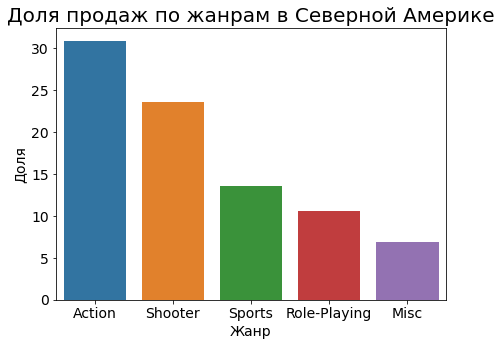

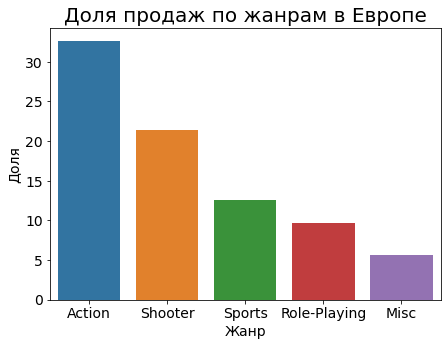

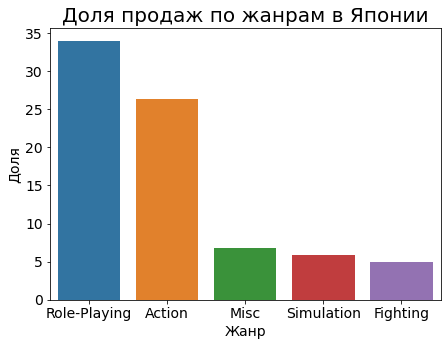

In [132]:
#Северная Америка

df_na_genre = df_years.pivot_table(index='genre', values='na_sales', aggfunc=sum).reset_index().sort_values(by='na_sales', ascending=False)


na_sum = df_na_genre['na_sales'].sum()

df_na_genre['proportion'] = df_na_genre['na_sales'] / na_sum * 100
df_na_genre['proportion'] = df_na_genre['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

plt.figure(figsize=(7, 5))

sns.barplot(x='genre', y='proportion', data=df_na_genre.head(5))

plt.title('Доля продаж по жанрам в Северной Америке', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Жанр', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


#Европа
df_eu_genre = df_years.pivot_table(index='genre', values='eu_sales', aggfunc=sum).reset_index().sort_values(by='eu_sales', ascending=False)

eu_sum = df_eu_genre['eu_sales'].sum()

df_eu_genre['proportion'] = df_eu_genre['eu_sales'] / eu_sum * 100
df_eu_genre['proportion'] = df_eu_genre['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

plt.figure(figsize=(7, 5))

sns.barplot(x='genre', y='proportion', data=df_eu_genre.head(5))

plt.title('Доля продаж по жанрам в Европе', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Жанр', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


#Япония
df_jp_genre = df_years.pivot_table(index='genre', values='jp_sales', aggfunc=sum).reset_index().sort_values(by='jp_sales', ascending=False)

jp_sum = df_jp_genre['jp_sales'].sum()

df_jp_genre['proportion'] = df_jp_genre['jp_sales'] / jp_sum * 100
df_jp_genre['proportion'] = df_jp_genre['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

plt.figure(figsize=(7, 5))

sns.barplot(x='genre', y='proportion', data=df_jp_genre.head(5))

plt.title('Доля продаж по жанрам в Японии', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Жанр', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

 Япония в который раз подтвердила свою особенность от «западного» рынка. Тотальная доминация (более трети рынка) — это РПГ. В свою очередь шутеры в Японии не в почете (отсутствуют в топ-5).
 
По рынку Европы и Северной Америки картина схожая в топ-5. Экшен игры с третью рынка на первом месте, потом Шутеры с около 20-25% процентами рынка, Спорт, РПГ и Misc.


<a id='43'></a>
### Влияние возрастного рейтинга на продажи

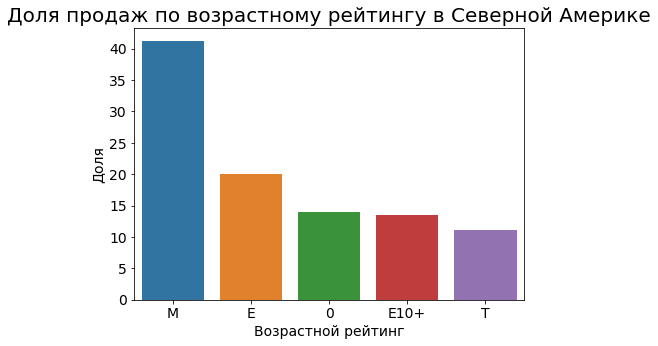

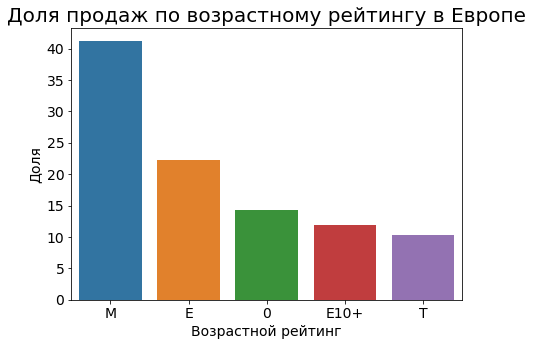

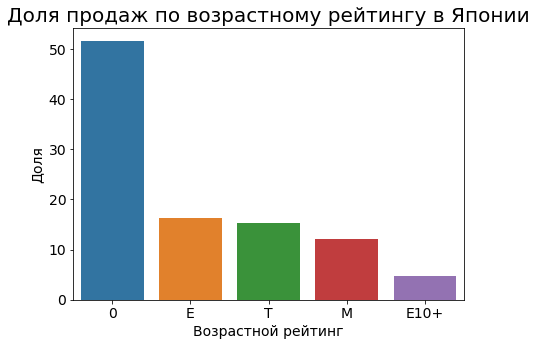

In [133]:
#Северная Америка

df_na_rating = df_years.pivot_table(index='rating', values='na_sales', aggfunc=sum).reset_index().sort_values(by='na_sales', ascending=False)


na_sum = df_na_rating['na_sales'].sum()

df_na_rating['proportion'] = df_na_rating['na_sales'] / na_sum * 100
df_na_rating['proportion'] = df_na_rating['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

plt.figure(figsize=(7, 5))

sns.barplot(x='rating', y='proportion', data=df_na_rating)

plt.title('Доля продаж по возрастному рейтингу в Северной Америке', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Возрастной рейтинг', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#Европа
df_eu_rating = df_years.pivot_table(index='rating', values='eu_sales', aggfunc=sum).reset_index().sort_values(by='eu_sales', ascending=False)

eu_sum = df_eu_rating['eu_sales'].sum()

df_eu_rating['proportion'] = df_eu_rating['eu_sales'] / eu_sum * 100
df_eu_rating['proportion'] = df_eu_rating['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

plt.figure(figsize=(7, 5))

sns.barplot(x='rating', y='proportion', data=df_eu_rating)

plt.title('Доля продаж по возрастному рейтингу в Европе', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Возрастной рейтинг', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#Япония
df_jp_rating = df_years.pivot_table(index='rating', values='jp_sales', aggfunc=sum).reset_index().sort_values(by='jp_sales', ascending=False)

jp_sum = df_jp_rating['jp_sales'].sum()

df_jp_rating['proportion'] = df_jp_rating['jp_sales'] / jp_sum * 100
df_jp_rating['proportion'] = df_jp_rating['proportion'].apply(lambda x: format(x, '.2f')).astype('float')

plt.figure(figsize=(7, 5))

sns.barplot(x='rating', y='proportion', data=df_jp_rating)

plt.title('Доля продаж по возрастному рейтингу в Японии', fontsize=20)
plt.ylabel('Доля', fontsize=14)
plt.xlabel('Возрастной рейтинг', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

**Вывод**

 Продолжение тенденции нелюбви к шутерам (которые как правило имеют рейтинг M), продолжается и в анализе по продажам по возрастному рейтингу. Японцы не очень охотно покупают взрослые игры. Также интересен факт наличия более 50% рынка Японии как не рейтинговые игры. Скорее всего это игры для местного рынка, которые не рейтингуются западной компанией. 
 
В части Европы и США картина очень похожая, местами до сотых процента.
Наиболее любимые игры это игры для взрослых (М), более 40% рынка. 
Игры для детей чуть более 20%. А на третьем месте игры без рейтинга, что достаточно интересно.
Скорее всего эти игры рейтингуются иными рейтинговыми компаниями. 

<a id='5'></a>
## Проверка гипотез

-	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
-	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
-   Как вы сформулировали нулевую и альтернативную гипотезы;
-	Какой критерий применили для проверки гипотез и почему.


<a id='51'></a>
### Гипотеза о равенстве средних пользовательских рейтингов XBox One и PC

Постановка гипотезы:

Н0 - средний пользовательский рейтинг Xbox One и PC РАВНЫ;

Н1 - средний пользовательский рейтинг Xbox One и PC НЕ РАВНЫ;

В данном случае альтернативная гипотеза - двусторонняя.

Потребуется использовать функцию st.ttest_ind для проверки гипотезы о неравенстве среднего двух генеральных совокупностей по взятым из них выборкам, т.к. нельзя утверждать, что предоставленные данные являются генеральной совокупностью, то есть охватывают все существующие игры и оценки на них.

In [134]:
xbox_score = df_years.query('platform == "XOne"')
xbox_score = xbox_score['user_score']

pc_score = df_years.query('platform == "PC"')
pc_score = pc_score['user_score']

In [135]:
np.var(xbox_score)

955.8360937500007

In [136]:
np.var(pc_score)

834.4221938775513

In [137]:
xbox_score.mean()

46.9625

In [138]:
pc_score.mean()

53.107142857142854

In [139]:
pc_score.mean() / xbox_score.mean()

1.1308414768622381

In [140]:
alpha = 0.05

#не используем опцию equal_var=False ввиду отсутствия значительного различия дисперсий выборок

results = st.ttest_ind(xbox_score, pc_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.05455458257277303
Не получилось отвергнуть нулевую гипотезу


**Таким образом гипотеза о РАВЕНСТВЕ средних двух выборок НЕ ОТВЕРГАЕТСЯ. Возможно утверждать, что средняя оценка двух платформ ОДАНАКОВАЯ.**

<a id='52'></a>
### Гипотеза о равенстве средних пользовательских рейтингов жанра Action и Sport

В рамках постановки гипотез пойдем от обратного, то есть равенства среднего двух выборок.

Постановка гипотезы:

Н0 - средняя пользовательская оценка жанра Action и Sports РАВНЫ;

Н1 - средняя пользовательская оценка жанра Action и Sports НЕ РАВНЫ;

В данном случае альтернативная гипотеза - двусторонняя. 

Потребуется использовать функцию st.ttest_ind для проверки гипотезы о неравенстве среднего двух генеральных совокупностей по взятым из них выборкам.

In [141]:
sport_score = df_years.query('genre == "Sports"')
sport_score = sport_score['user_score']

action_score = df_years.query('genre == "Action"')
action_score = action_score['user_score']

In [142]:
np.var(action_score)

1269.886873306961

In [143]:
np.var(sport_score)

802.1003925619842

In [144]:
action_score.mean()

35.23094958968347

In [145]:
sport_score.mean()

39.222727272727276

In [146]:
sport_score.mean() / action_score.mean()

1.1133031533221205

In [147]:
alpha = 0.05

#не используем опцию equal_var=False ввиду отсутствия значительного различия дисперсий выборок

results = st.ttest_ind(action_score, sport_score)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.12403125472948508
Не получилось отвергнуть нулевую гипотезу


**Таким образом гипотеза о РАВЕНСТВЕ средних двух выборок НЕ ОТВЕРГАЕТСЯ. Возможно утверждать, что средняя оценка двух жанров ОДИНАКОВАЯ.**

<a id='6'></a>
## Общий вывод

В рамках задачи формирования рекламного бюджета можно выделить следующие предпосылки для успешного вложения средств:
- ориентация на новые платформы, находящиеся в стадии роста (Xbox One, PS4), а также стабильную по продажам платформу PC. Отслеживание выхода новых платформ (например Switch);
- ориентация на самые популярные жанры (Action, Sports, Shooter);
- учет региональных особенностей при запуске рекламных компаний. Раздельная рекламная компания для Японии (ориентация на семейные игры, РПГ и компактные консоли) и для Запада (Экшен, Шутеры, Спорт, возможно реклама взрослых игр);
- не обращать особого внимания на пользовательские оценки, т.к. влияние между оценками и продажами минимальная (пример франшиз Call of Duty, FIFA);
- возможно частично учитывать мнение и высокие оценки критиков (80+);
- регулярное отслеживание новостей в части выхода обновленных версий консолей, как правило цикл спада в рамках семейства одинаковый и спад начинается с момента насыщения рынка играми на старую платформу и анонса выхода новой платформы.
